In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import datetime as dt
import matplotlib
import matplotlib.pyplot as plt
import os
import io
import geopandas as gpd
import seaborn as sns
import statsmodels.api as sm
from functools import reduce
import scipy.stats as stats
from collections import OrderedDict

# suppress warning

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', None)
# display all columns
# avoid scientific digit
pd.options.display.float_format = '{:.8f}'.format

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Income Diversity Ratio (2021)**

In [4]:
link_idr = '/content/drive/My Drive/X999/Income_Diversity_Ratio.csv'
link_median_income = '/content/drive/My Drive/X999/median_income_change.csv'
idr_df = pd.read_csv(link_idr, skiprows=5)
median_income_df = pd.read_csv(link_median_income)

In [5]:
median_income_df.rename(columns={'mediaon_income': 'median_income'}, inplace=True)
median_income_df

,Location,2005_median_income,2023_median_income,income_change,income_change_ratio,median_income
0,Astoria,57043.75476000,84590.00000000,27546.24524000,48.28967756,70816.87738000
1,Battery Park/Tribeca,140726.90213000,198945.00000000,58218.09787000,41.36955834,169835.95106500
2,Bay Ridge,73578.13255000,88566.00000000,14987.86745000,20.37000251,81072.06627500
3,Bayside,100193.30340000,107607.00000000,7413.69660000,7.39939332,103900.15170000
4,Bedford Park,44228.93073000,42387.00000000,-1841.93073000,-4.16453823,43307.96536500
...,...,...,...,...,...,...
60,Upper West Side,127323.18661000,150017.00000000,22693.81339000,17.82378685,138670.09330500
61,Washington Heights,48096.84277000,61527.00000000,13430.15723000,27.92315765,54811.92138500
62,Williamsbridge,60150.19527000,67973.00000000,7822.80473000,13.00545193,64061.59763500
63,Williamsburg/Greenpoint,46104.60315000,111492.00000000,65387.39685000,141.82400971,78798.30157500


In [6]:
idr_df.TimeFrame.unique()

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2021])

In [7]:
idr_df

,Location,TimeFrame,DataFormat,Data,Fips
0,Battery Park/Tribeca,2010,Rate,6.23288000,101
1,Greenwich Village,2010,Rate,6.23288000,102
2,Lower East Side,2010,Rate,7.46179000,103
3,Chelsea/Clinton,2010,Rate,8.43494000,104
4,Midtown Business District,2010,Rate,8.43494000,105
...,...,...,...,...,...
710,Brooklyn,2021,Rate,6.93041000,36047
711,Manhattan,2021,Rate,9.61720000,36061
712,Queens,2021,Rate,5.11135000,36081
713,Staten Island,2021,Rate,5.38239000,36085


In [8]:
idr_df.sort_values('Data', ascending=False, inplace=True)
idr_df

,Location,TimeFrame,DataFormat,Data,Fips
494,Brownsville,2017,Rate,12.48658000,316
522,Lower East Side,2018,Rate,11.47061000,103
587,Lower East Side,2019,Rate,10.97049000,103
671,Lower East Side,2021,Rate,10.89705000,103
595,East Harlem,2019,Rate,10.67941000,111
...,...,...,...,...,...
654,Morrisania,2021,Rate,3.09371000,203
669,Midtown Business District,2021,Rate,2.95060000,105
673,Greenwich Village,2021,Rate,2.81659000,102
661,Hunts Point,2021,Rate,2.47777000,202


In [9]:
idr_df.drop(columns=['DataFormat'], inplace=True)

In [10]:
idr_2017 = idr_df[idr_df['TimeFrame'] == 2017]
idr_2018 = idr_df[idr_df['TimeFrame'] == 2018]
idr_2019 = idr_df[idr_df['TimeFrame'] == 2019]
idr_2020 = idr_df[idr_df['TimeFrame'] == 2020]
idr_2021 = idr_df[idr_df['TimeFrame'] == 2021]

In [11]:
idr_2017 = idr_2017.drop(columns=['Fips'])
idr_2018 = idr_2018.drop(columns=['Fips'])
idr_2019 = idr_2019.drop(columns=['Fips'])
idr_2020 = idr_2020.drop(columns=['Fips'])

In [12]:
merged = idr_2017.merge(
    idr_2018,
    on='Location',
    how='inner',
    suffixes=('_2017', '_2018')
)
merged

,Location,TimeFrame_2017,Data_2017,TimeFrame_2018,Data_2018
0,Brownsville,2017,12.48658000,2018,7.68692000
1,Manhattan,2017,9.32578000,2018,9.43389000
2,Central Harlem,2017,9.19346000,2018,9.35267000
3,Lower East Side,2017,9.04179000,2018,11.47061000
4,St. George,2017,8.73224000,2018,8.15794000
...,...,...,...,...,...
60,Upper East Side,2017,4.22905000,2018,4.82887000
61,Woodhaven,2017,4.14561000,2018,4.65022000
62,Elmhurst/Corona,2017,4.14195000,2018,3.50113000
63,Ridgewood/Glendale,2017,4.08153000,2018,4.10261000


In [13]:
merged = merged.merge(
    idr_2019,
    on='Location',
    how='inner',
    suffixes=('', '_2019')
)
merged

,Location,TimeFrame_2017,Data_2017,TimeFrame_2018,Data_2018,TimeFrame,Data
0,Brownsville,2017,12.48658000,2018,7.68692000,2019,8.79087000
1,Manhattan,2017,9.32578000,2018,9.43389000,2019,9.20289000
2,Central Harlem,2017,9.19346000,2018,9.35267000,2019,8.89311000
3,Lower East Side,2017,9.04179000,2018,11.47061000,2019,10.97049000
4,St. George,2017,8.73224000,2018,8.15794000,2019,5.63351000
...,...,...,...,...,...,...,...
60,Upper East Side,2017,4.22905000,2018,4.82887000,2019,4.35345000
61,Woodhaven,2017,4.14561000,2018,4.65022000,2019,4.44874000
62,Elmhurst/Corona,2017,4.14195000,2018,3.50113000,2019,3.52181000
63,Ridgewood/Glendale,2017,4.08153000,2018,4.10261000,2019,4.45823000


In [14]:
idr_2020
# skip merging

,Location,TimeFrame,Data


In [15]:
merged_df = merged.merge(
    idr_2021,
    on='Location',
    how='inner',
    suffixes=('_2019', '_2021')
)
merged_df

,Location,TimeFrame_2017,Data_2017,TimeFrame_2018,Data_2018,TimeFrame_2019,Data_2019,TimeFrame_2021,Data_2021,Fips
0,Brownsville,2017,12.48658000,2018,7.68692000,2019,8.79087000,2021,6.36949000,316
1,Manhattan,2017,9.32578000,2018,9.43389000,2019,9.20289000,2021,9.61720000,36061
2,Central Harlem,2017,9.19346000,2018,9.35267000,2019,8.89311000,2021,9.06509000,110
3,Lower East Side,2017,9.04179000,2018,11.47061000,2019,10.97049000,2021,10.89705000,103
4,St. George,2017,8.73224000,2018,8.15794000,2019,5.63351000,2021,6.37477000,501
...,...,...,...,...,...,...,...,...,...,...
60,Upper East Side,2017,4.22905000,2018,4.82887000,2019,4.35345000,2021,4.63626000,108
61,Woodhaven,2017,4.14561000,2018,4.65022000,2019,4.44874000,2021,4.95624000,409
62,Elmhurst/Corona,2017,4.14195000,2018,3.50113000,2019,3.52181000,2021,5.19213000,404
63,Ridgewood/Glendale,2017,4.08153000,2018,4.10261000,2019,4.45823000,2021,4.26339000,405


In [16]:
merged_df.drop(columns=['TimeFrame_2017', 'TimeFrame_2018', 'TimeFrame_2021', 'TimeFrame_2019'], inplace=True)

In [17]:
merged_df.head()

,Location,Data_2017,Data_2018,Data_2019,Data_2021,Fips
0,Brownsville,12.48658000,7.68692000,8.79087000,6.36949000,316
1,Manhattan,9.32578000,9.43389000,9.20289000,9.61720000,36061
2,Central Harlem,9.19346000,9.35267000,8.89311000,9.06509000,110
3,Lower East Side,9.04179000,11.47061000,10.97049000,10.89705000,103
4,St. George,8.73224000,8.15794000,5.63351000,6.37477000,501


In [18]:
merged_df['avg_idr'] = (merged_df['Data_2017'] + merged_df['Data_2018'] + merged_df['Data_2019'] + merged_df['Data_2021'])/4
merged_df

,Location,Data_2017,Data_2018,Data_2019,Data_2021,Fips,avg_idr
0,Brownsville,12.48658000,7.68692000,8.79087000,6.36949000,316,8.83346500
1,Manhattan,9.32578000,9.43389000,9.20289000,9.61720000,36061,9.39494000
2,Central Harlem,9.19346000,9.35267000,8.89311000,9.06509000,110,9.12608250
3,Lower East Side,9.04179000,11.47061000,10.97049000,10.89705000,103,10.59498500
4,St. George,8.73224000,8.15794000,5.63351000,6.37477000,501,7.22461500
...,...,...,...,...,...,...,...
60,Upper East Side,4.22905000,4.82887000,4.35345000,4.63626000,108,4.51190750
61,Woodhaven,4.14561000,4.65022000,4.44874000,4.95624000,409,4.55020250
62,Elmhurst/Corona,4.14195000,3.50113000,3.52181000,5.19213000,404,4.08925500
63,Ridgewood/Glendale,4.08153000,4.10261000,4.45823000,4.26339000,405,4.22644000


In [19]:
merged_df['change_2017_2018'] = (merged_df['Data_2018'] - merged_df['Data_2017'])/merged_df['Data_2017']*100
merged_df['change_2018_2019'] = (merged_df['Data_2019'] - merged_df['Data_2018']) /merged_df['Data_2018']*100
merged_df['change_2019_2021'] = (merged_df['Data_2021'] - merged_df['Data_2019'])/merged_df['Data_2019']*100
merged_df

,Location,Data_2017,Data_2018,Data_2019,Data_2021,Fips,avg_idr,change_2017_2018,change_2018_2019,change_2019_2021
0,Brownsville,12.48658000,7.68692000,8.79087000,6.36949000,316,8.83346500,-38.43854762,14.36140873,-27.54425899
1,Manhattan,9.32578000,9.43389000,9.20289000,9.61720000,36061,9.39494000,1.15925960,-2.44861876,4.50195536
2,Central Harlem,9.19346000,9.35267000,8.89311000,9.06509000,110,9.12608250,1.73177454,-4.91367706,1.93385666
3,Lower East Side,9.04179000,11.47061000,10.97049000,10.89705000,103,10.59498500,26.86215893,-4.36001224,-0.66943227
4,St. George,8.73224000,8.15794000,5.63351000,6.37477000,501,7.22461500,-6.57677755,-30.94445411,13.15804889
...,...,...,...,...,...,...,...,...,...,...
60,Upper East Side,4.22905000,4.82887000,4.35345000,4.63626000,108,4.51190750,14.18332722,-9.84536755,6.49622713
61,Woodhaven,4.14561000,4.65022000,4.44874000,4.95624000,409,4.55020250,12.17215319,-4.33269824,11.40772443
62,Elmhurst/Corona,4.14195000,3.50113000,3.52181000,5.19213000,404,4.08925500,-15.47145668,0.59066644,47.42788509
63,Ridgewood/Glendale,4.08153000,4.10261000,4.45823000,4.26339000,405,4.22644000,0.51647299,8.66814053,-4.37034428


In [20]:
merged_df['avg_change'] = (merged_df['change_2017_2018'] + merged_df['change_2018_2019'] + merged_df['change_2019_2021'])/3
merged_df

,Location,Data_2017,Data_2018,Data_2019,Data_2021,Fips,avg_idr,change_2017_2018,change_2018_2019,change_2019_2021,avg_change
0,Brownsville,12.48658000,7.68692000,8.79087000,6.36949000,316,8.83346500,-38.43854762,14.36140873,-27.54425899,-17.20713263
1,Manhattan,9.32578000,9.43389000,9.20289000,9.61720000,36061,9.39494000,1.15925960,-2.44861876,4.50195536,1.07086540
2,Central Harlem,9.19346000,9.35267000,8.89311000,9.06509000,110,9.12608250,1.73177454,-4.91367706,1.93385666,-0.41601528
3,Lower East Side,9.04179000,11.47061000,10.97049000,10.89705000,103,10.59498500,26.86215893,-4.36001224,-0.66943227,7.27757147
4,St. George,8.73224000,8.15794000,5.63351000,6.37477000,501,7.22461500,-6.57677755,-30.94445411,13.15804889,-8.12106093
...,...,...,...,...,...,...,...,...,...,...,...
60,Upper East Side,4.22905000,4.82887000,4.35345000,4.63626000,108,4.51190750,14.18332722,-9.84536755,6.49622713,3.61139560
61,Woodhaven,4.14561000,4.65022000,4.44874000,4.95624000,409,4.55020250,12.17215319,-4.33269824,11.40772443,6.41572646
62,Elmhurst/Corona,4.14195000,3.50113000,3.52181000,5.19213000,404,4.08925500,-15.47145668,0.59066644,47.42788509,10.84903162
63,Ridgewood/Glendale,4.08153000,4.10261000,4.45823000,4.26339000,405,4.22644000,0.51647299,8.66814053,-4.37034428,1.60475641


## **Because these neighborhoods do not match exactly with the eviction data neighborhoods, we do an approximate mapping and recalculate the evictions per neighborhood in eviction dataset, by taking the mean of the re-mapped neighborhoods. We will also drop a few nta that do not fit well and whose eviction data did not matter that much, e.g. cemetery evictions and a nta largely in Long Island.**

In [21]:
link_eviction = '/content/drive/My Drive/X999/bbl_evictions_311_svi_normal_times_svi_zipcode.csv'
eviction_df = pd.read_csv(link_eviction)
eviction_df.columns[-45:]

Index(['average_year_eviction_count(building)',
       'average_year_eviction_count_per_nta(nta)',
       'evictions_per_nta_1kpop(nta)', 'buildings_affected_per_nta',
       'unit_per_nta', 'evictions_per_1kunit_nta_1kpop(nta)',
       'children_impacted_nta_per_1kpop', 'poverty_impacted_nta_per_1kpop',
       'disability_impacted_nta_per_1kpop',
       'unemployed_impacted_nta_per_1kpop', 'elderly_impacted_nta_per_1kpop',
       'bh_impacted_nta_per_1kpop', 'hburd_impacted_nta_per_1kpop',
       'average_year_eviction_per_building_nta(nta)',
       'average_5year_eviction_count_per_unit(building)', 'bh_pct',
       'unit_count_zipcode', 'building_count_zipcode',
       'average_year_eviction_count_per_zipcode(z)',
       'average_year_eviction_per_building_zipcode(z)',
       'evictions_per_zipcode_1kpop(z)',
       'evictions_per_1kunit_zipcode_1kpop(z)',
       'children_impacted_zipcode_per_1kpop(z)',
       'poverty_impacted_zipcode_per_1kpop(z)',
       'disability_impacted_zipc

In [22]:
eviction_df.drop(columns=['evictions_per_nta_1kpop(nta)', 'buildings_affected_per_nta',
       'unit_per_nta', 'evictions_per_1kunit_nta_1kpop(nta)',
       'children_impacted_nta_per_1kpop', 'poverty_impacted_nta_per_1kpop',
       'disability_impacted_nta_per_1kpop',
       'unemployed_impacted_nta_per_1kpop', 'elderly_impacted_nta_per_1kpop',
       'bh_impacted_nta_per_1kpop', 'hburd_impacted_nta_per_1kpop',
       'average_year_eviction_per_building_nta(nta)'], inplace=True)

In [23]:
# eviction_df.nta.unique(), eviction_df.shape

In [24]:
# merged_df.Location.unique()

In [25]:
# len(nta_mapping)

In [26]:
nta_mapping = {
    'East New York': 'East New York',
    'Sunset Park East': 'Sunset Park',
    'Sunset Park West': 'Sunset Park',
    'Van Cortlandt Village': 'Riverdale',
    'Mott Haven-Port Morris': 'Mott Haven',
    'Bedford Park-Fordham North': 'Bedford Park',
    'Claremont-Bathgate': 'Morrisania',
    'Brighton Beach': 'Coney Island',
    'Charleston-Richmond Valley-Tottenville': 'Tottenville',
    'Mount Hope': 'University Heights',
    'Central Harlem North-Polo Grounds': 'Central Harlem',
    'Melrose South-Mott Haven North': 'Mott Haven',
    'Morrisania-Melrose': 'Morrisania',
    'Port Richmond': 'St. George',
    'Bronxdale': 'Bedford Park',
    'Highbridge': 'Concourse/Highbridge',
    'Norwood': 'Bedford Park',
    'East Tremont': 'East Tremont',
    'Soundview-Bruckner': 'Unionport/Soundview',
    'Kingsbridge Heights': 'University Heights',
    'West Concourse': 'Concourse/Highbridge',
    'Crown Heights South': 'Crown Heights South',
    'Belmont': 'Bedford Park',
    'Old Town-Dongan Hills-South Beach': 'South Beach',
    'Douglas Manor-Douglaston-Little Neck': 'Bayside',
    'Murray Hill': 'Murray Hill/Stuyvesant',
    'Midwood': 'Flatbush/Midwood',
    'North Corona': 'Elmhurst/Corona',
    'Crown Heights North': 'Crown Heights North',
    "Mariner's Harbor-Arlington-Port Ivory-Graniteville": 'St. George',
    'East Concourse-Concourse Village': 'Concourse/Highbridge',
    'Williamsbridge-Olinville': 'Williamsbridge',
    'Rugby-Remsen Village': 'Crown Heights South',
    'Canarsie': 'Canarsie',
    'Briarwood-Jamaica Hills': 'Fresh Meadows/Briarwood',
    'Kew Gardens': 'Rego Park/Forest Hills',
    'Jamaica': 'Jamaica/St. Albans',
    'Washington Heights North': 'Washington Heights',
    'Borough Park': 'Borough Park',
    'Hunters Point-Sunnyside-West Maspeth': 'Sunnyside/Woodside',
    'Battery Park City-Lower Manhattan': 'Battery Park/Tribeca',
    'Jackson Heights': 'Jackson Heights',
    'College Point': 'Flushing',
    'Jamaica Estates-Holliswood': 'Jamaica/St. Albans',
    'Richmond Hill': 'Rego Park/Forest Hills',
    'Westchester-Unionport': 'Unionport/Soundview',
    'Elmhurst': 'Elmhurst/Corona',
    'Corona': 'Elmhurst/Corona',
    'Gramercy': 'Murray Hill/Stuyvesant',
    'Forest Hills': 'Rego Park/Forest Hills',
    'Washington Heights South': 'Washington Heights',
    'West Brighton': 'St. George',
    'Prospect Lefferts Gardens-Wingate': 'Flatbush/Midwood',
    'Sheepshead Bay-Gerritsen Beach-Manhattan Beach': 'Sheepshead Bay',
    'Bushwick North': 'Bushwick',
    'West New Brighton-New Brighton-St. George': 'St. George',
    'East Flatbush-Farragut': 'East Flatbush',
    'Flatbush': 'Flatbush/Midwood',
    'Crotona Park East': 'Morrisania',
    'park-cemetery-etc-Bronx': 'Bedford Park',
    'Longwood': 'Hunts Point',
    'Brownsville': 'Brownsville',
    'University Heights-Morris Heights': 'University Heights',
    'Pomonok-Flushing Heights-Hillcrest': 'Flushing',
    'Central Harlem South': 'Central Harlem',
    'Seagate-Coney Island': 'Coney Island',
    'Lower East Side': 'Lower East Side',
    'Manhattanville': 'Manhattanville',
    'West Farms-Bronx River': 'Unionport/Soundview',
    'Hunts Point': 'Hunts Point',
    'Pelham Bay-Country Club-City Island': 'Throgs Neck',
    'Hudson Yards-Chelsea-Flatiron-Union Square': 'Chelsea/Clinton',
    'Flatlands': 'Canarsie',
    'Soundview-Castle Hill-Clason Point-Harding Park': 'Unionport/Soundview',
    'Marble Hill-Inwood': 'Washington Heights',
    'East Harlem North': 'East Harlem',
    'North Side-South Side': 'Greenwich Village',
    'Schuylerville-Throgs Neck-Edgewater Park': 'Throgs Neck',
    'Fordham South': 'Bedford Park',
    'New Springville-Bloomfield-Travis': 'St. George',
    'Park Slope-Gowanus': 'Park Slope',
    'Grasmere-Arrochar-Ft. Wadsworth': 'St. George',
    'Old Astoria': 'Astoria',
    'Flushing': 'Flushing',
    'East Harlem South': 'East Harlem',
    'Rego Park': 'Rego Park/Forest Hills',
    'Bensonhurst West': 'Bensonhurst',
    'Oakwood-Oakwood Beach': 'Tottenville',
    'Stapleton-Rosebank': 'St. George',
    'Pelham Parkway': 'Pelham Parkway',
    'Clinton': 'Chelsea/Clinton',
    'New Brighton-Silver Lake': 'St. George',
    'SoHo-TriBeCa-Civic Center-Little Italy': 'Battery Park/Tribeca',
    'Yorkville': 'Upper East Side',
    'Woodhaven': 'Woodhaven',
    'Queens Village': 'Queens Village',
    'Grymes Hill-Clifton-Fox Hills': 'St. George',
    'Hollis': 'Jamaica/St. Albans',
    'Steinway': 'Astoria',
    'Baisley Park': 'Jamaica/St. Albans',
    'Bay Ridge': 'Bay Ridge',
    'West Village': 'Greenwich Village',
    'Ozone Park': 'Howard Beach',
    'South Jamaica': 'Jamaica/St. Albans',
    'Lenox Hill-Roosevelt Island': 'Upper East Side',
    'South Ozone Park': 'Howard Beach',
    'Hamilton Heights': 'Washington Heights',
    'Erasmus': 'Flatbush/Midwood',
    'Elmhurst-Maspeth': 'Elmhurst/Corona',
    'St. Albans': 'Jamaica/St. Albans',
    'Woodlawn-Wakefield': 'Riverdale',
    'East Williamsburg': 'Bushwick',
    'Kew Gardens Hills': 'Rego Park/Forest Hills',
    'Ridgewood': 'Ridgewood/Glendale',
    'Bayside-Bayside Hills': 'Bayside',
    'East New York (Pennsylvania Ave)': 'East New York',
    'Bellerose': 'Queens Village',
    'Georgetown-Marine Park-Bergen Beach-Mill Basin': 'Sheepshead Bay',
    'Carroll Gardens-Columbia Street-Red Hook': 'Fort Greene/Brooklyn Hts',
    'Woodside': 'Sunnyside/Woodside',
    'Morningside Heights': 'Upper West Side',
    'East Flushing': 'Flushing',
    'Van Nest-Morris Park-Westchester Square': 'Pelham Parkway',
    'Upper West Side': 'Upper West Side',
    'Auburndale': 'Bayside',
    'Kensington-Ocean Parkway': 'Flatbush/Midwood',
    'Bath Beach': 'Bensonhurst',
    'Bensonhurst East': 'Bensonhurst',
    'Glendale': 'Ridgewood/Glendale',
    'Clinton Hill': 'Fort Greene/Brooklyn Hts',
    'East Village': 'Lower East Side',
    'Bushwick South': 'Bushwick',
    'Madison': 'Murray Hill/Stuyvesant',
    'Prospect Heights': 'Crown Heights North',
    'Homecrest': 'Sheepshead Bay',
    'Ocean Hill': 'Brownsville',
    'Spuyten Duyvil-Kingsbridge': 'Riverdale',
    'Cypress Hills-City Line': 'East New York',
    'Laurelton': 'Jamaica/St. Albans',
    'Astoria': 'Astoria',
    'Whitestone': 'Bayside',
    'Lindenwood-Howard Beach': 'Howard Beach',
    'Stuyvesant Heights': 'Bedford Stuyvesant',
    'Chinatown': 'Lower East Side',
    'Rosedale': 'Jamaica/St. Albans',
    'East Elmhurst': 'Elmhurst/Corona',
    'Windsor Terrace': 'Park Slope',
    'Cambria Heights': 'Jamaica/St. Albans',
    'Greenpoint': 'Williamsburg/Greenpoint',
    'Bedford': 'Bedford Stuyvesant',
    'Middle Village': 'Ridgewood/Glendale',
    'Springfield Gardens North': 'Jamaica/St. Albans',
    'Lincoln Square': 'Upper West Side',
    'Co-op City': 'Riverdale',
    'Parkchester': 'Unionport/Soundview',
    'Gravesend': 'Bensonhurst',
    'Oakland Gardens': 'Bayside',
    'Great Kills': 'Tottenville',
    'Queensboro Hill': 'Flushing',
    'Starrett City': 'East New York',
    'Murray Hill-Kips Bay': 'Murray Hill/Stuyvesant',
    'Todt Hill-Emerson Hill-Heartland Village-Lighthouse Hill': 'St. George',
    'Springfield Gardens South-Brookville': 'Jamaica/St. Albans',
    'Turtle Bay-East Midtown': 'Midtown Business District',
    'Ocean Parkway South': 'Flatbush/Midwood',
    'Ft. Totten-Bay Terrace-Clearview': 'Bayside',
    'Glen Oaks-Floral Park-New Hyde Park': 'Fresh Meadows/Briarwood',
    'Queensbridge-Ravenswood-Long Island City': 'Astoria',
    'Upper East Side-Carnegie Hill': 'Upper East Side',
    'Fort Greene': 'Fort Greene/Brooklyn Hts',
    'DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill': 'Fort Greene/Brooklyn Hts',
    'Eastchester-Edenwald-Baychester': 'Riverdale',
    'Stuyvesant Town-Cooper Village': 'Murray Hill/Stuyvesant',
    'Arden Heights': 'Tottenville',
    'Dyker Heights': 'Bensonhurst',
    'North Riverdale-Fieldston-Riverdale': 'Riverdale',
    'Williamsburg': 'Williamsburg/Greenpoint',
    'Allerton-Pelham Gardens': 'Pelham Parkway',
    "Annadale-Huguenot-Prince's Bay-Eltingville": 'Tottenville',
    'Fresh Meadows-Utopia': 'Fresh Meadows/Briarwood',
    'Westerleigh': 'St. George',
    'New Dorp-Midland Beach': 'South Beach',
    'Rossville-Woodrow': 'Tottenville',
    'Midtown-Midtown South': 'Midtown Business District',
    'Maspeth': 'Sunnyside/Woodside',
    'Brooklyn Heights-Cobble Hill': 'Fort Greene/Brooklyn Hts',
    'park-cemetery-etc-Brooklyn': 'Flatbush/Midwood'
}

In [27]:
# len(neighborhood_mapping)

In [28]:
eviction_df.shape

(66395, 125)

In [29]:
# nta_to_remove = ['park-cemetery-etc-Bronx', 'park-cemetery-etc-Brooklyn',
#                  'Glen Oaks-Floral Park-New Hyde Park', "park-cemetery-etc-Manhattan",
#                   "park-cemetery-etc-Queens",
#                   "park-cemetery-etc-Staten Island"]
# eviction_df = eviction_df[~eviction_df['nta'].isin(nta_to_remove)]
# eviction_df.shape

In [30]:
merged_df.Location.unique()

array(['Brownsville', 'Manhattan', 'Central Harlem', 'Lower East Side',
       'St. George', 'Midtown Business District', 'Chelsea/Clinton',
       'Crown Heights North', 'Williamsburg/Greenpoint', 'Manhattanville',
       'East New York', 'Coney Island', 'Upper West Side', 'East Harlem',
       'Bushwick', 'Brooklyn', 'Bedford Stuyvesant', 'New York City',
       'Flatbush/Midwood', 'Bronx', 'Fort Greene/Brooklyn Hts',
       'Morrisania', 'East Tremont', 'Hunts Point', 'Mott Haven',
       'Unionport/Soundview', 'Sunset Park', 'Staten Island',
       'The Rockaways', 'Sheepshead Bay', 'Borough Park',
       'Murray Hill/Stuyvesant', 'Bedford Park', 'University Heights',
       'Washington Heights', 'Riverdale', 'Flushing',
       'Crown Heights South', 'East Flatbush', 'Bay Ridge',
       'Concourse/Highbridge', 'Throgs Neck', 'Tottenville',
       'Pelham Parkway', 'South Beach', 'Astoria', 'Bensonhurst',
       'Rego Park/Forest Hills', 'Williamsbridge',
       'Fresh Meadows/Briar

In [31]:
eviction_df.nta.nunique()

187

In [32]:
eviction_df['neighborhood'] = eviction_df['nta'].map(nta_mapping)
eviction_df.shape
# apply

(66395, 126)

In [33]:
bigger_names = ['Manhattan', 'The Rockaways', 'Staten Island', 'Queens', 'Bronx', 'Brooklyn', 'New York City']
ntas_in_bigger_names = merged_df[merged_df.Location.isin(bigger_names)]
merged_df_boro = merged_df[merged_df.Location.isin(bigger_names)]
merged_df = merged_df[~merged_df.Location.isin(bigger_names)]
merged_df.Location.nunique(), merged_df_boro.Location.nunique()

(58, 7)

In [34]:
merged_df.Location.unique()

array(['Brownsville', 'Central Harlem', 'Lower East Side', 'St. George',
       'Midtown Business District', 'Chelsea/Clinton',
       'Crown Heights North', 'Williamsburg/Greenpoint', 'Manhattanville',
       'East New York', 'Coney Island', 'Upper West Side', 'East Harlem',
       'Bushwick', 'Bedford Stuyvesant', 'Flatbush/Midwood',
       'Fort Greene/Brooklyn Hts', 'Morrisania', 'East Tremont',
       'Hunts Point', 'Mott Haven', 'Unionport/Soundview', 'Sunset Park',
       'Sheepshead Bay', 'Borough Park', 'Murray Hill/Stuyvesant',
       'Bedford Park', 'University Heights', 'Washington Heights',
       'Riverdale', 'Flushing', 'Crown Heights South', 'East Flatbush',
       'Bay Ridge', 'Concourse/Highbridge', 'Throgs Neck', 'Tottenville',
       'Pelham Parkway', 'South Beach', 'Astoria', 'Bensonhurst',
       'Rego Park/Forest Hills', 'Williamsbridge',
       'Fresh Meadows/Briarwood', 'Jamaica/St. Albans',
       'Greenwich Village', 'Battery Park/Tribeca', 'Park Slope',
    

In [35]:
eviction_df.neighborhood.nunique(), \
set(eviction_df.neighborhood.unique()) - set(merged_df.Location.unique())

(58, set())

In [36]:
# ntas_in_bigger_names

In [37]:
evi_nta_set = set(eviction_df.neighborhood.unique())
nta_set = set(merged_df.Location.unique())
len(nta_set), len(evi_nta_set)

(58, 58)

In [38]:
eviction_df.neighborhood.nunique()

58

In [39]:
unmapped = eviction_df[eviction_df['neighborhood'].isna()]['nta'].unique()
unmapped

array([], dtype=object)

In [40]:
# eviction_df_c = eviction_df.copy()

In [41]:
eviction_df_agg = eviction_df.groupby('neighborhood')['average_year_eviction_count_per_nta(nta)'].mean().reset_index()
eviction_df_agg

,neighborhood,average_year_eviction_count_per_nta(nta)
0,Astoria,45.45461638
1,Battery Park/Tribeca,26.13103448
2,Bay Ridge,82.40000000
3,Bayside,9.30274510
4,Bedford Park,206.57311134
5,Bedford Stuyvesant,139.17260073
6,Bensonhurst,40.41634938
7,Borough Park,33.80000000
8,Brownsville,169.40316880
9,Bushwick,103.08104803


In [42]:
eviction_df_agg = eviction_df.merge(
    eviction_df_agg,
    on = 'neighborhood',
    how='left'
)

In [43]:
eviction_df_agg[['nta', 'neighborhood']].head()

,nta,neighborhood
0,East New York,East New York
1,Sunset Park East,Sunset Park
2,Sunset Park West,Sunset Park
3,Van Cortlandt Village,Riverdale
4,Mott Haven-Port Morris,Mott Haven


In [44]:
eviction_df_agg.head()

,primary_key,bbl,court_index_number,docket_number,eviction_address,eviction_apartment_number,executed_date,borough,zipcode,ejectment,eviction/legal_possession,latitude,longitude,community_board,council_district,census_tract,bin,nta,year,month_year,geometry,yearbuilt,bldgclass,numfloors,unitsres,ownername,bldgarea,building_type,building_category,is_condo,floor_category,rent_era,architectural_style,economic_period,residential_units_category,is_llc,building_size_category,size_quartile,decade,fips,e_totpop,rpl_theme1,rpl_theme2,rpl_theme3,rpl_theme4,rpl_themes,ep_pov150,ep_unemp,ep_nohsdp,ep_uninsur,ep_age65,ep_age17,ep_disabl,ep_limeng,ep_noveh,ep_crowd,ep_hburd,ep_afam,ep_hisp,ep_asian,ep_aian,ep_nhpi,ep_twomore,ep_otherrace,ep_minrty,ep_white,invalid_zip,svi_quartile,svi_group,air_quality,animal_issues,appliances,building_exterior,doors_windows,electrical_issues,elevator_issues,floors_stairs,general_complaints,graffiti_posting,heat_hot_water,homeless_issues,noise_complaints,other_issues,pest_issues,plumbing_issues,police_matters,public_nuisance,safety_concerns,sanitation_issues,walls_ceilings,total_complaints,average_year_eviction_count_per_unit(building),average_year_eviction_count(building),average_year_eviction_count_per_nta(nta)_x,average_5year_eviction_count_per_unit(building),bh_pct,unit_count_zipcode,building_count_zipcode,average_year_eviction_count_per_zipcode(z),average_year_eviction_per_building_zipcode(z),evictions_per_zipcode_1kpop(z),evictions_per_1kunit_zipcode_1kpop(z),children_impacted_zipcode_per_1kpop(z),poverty_impacted_zipcode_per_1kpop(z),disability_impacted_zipcode_per_1kpop(z),unemployed_impacted_zipcode_per_1kpop(z),elderly_impacted_zipcode_per_1kpop(z),bh_impacted_zipcode_per_1kpop(z),hburd_impacted_zipcode_per_1kpop(z),crowd_impacted_zipcode_per_1kpop(z),limeng_impacted_zipcode_per_1kpop(z),uninsur_impacted_zipcode_per_1kpop(z),children_impacted_zipcode,people_impacted_zipcode,poverty_impacted_zipcode,disability_impacted_zipcode,unemployed_impacted_zipcode,elderly_impacted_zipcode,hburd_impacted_zipcode,bh_impacted_zipcode,crowd_impacted_zipcode,limeng_impacted_zipcode,uninsur_impacted_zipcode,novehicle_impacted_zipcode,nohsdp_impacted_zipcode,neighborhood,average_year_eviction_count_per_nta(nta)_y
0,*308072/22_5865,3037420029,*308072/22,5865,356 MILLER AVE,1 AND BASEMENT,2024-12-04,BROOKLYN,11207,Not an Ejectment,Possession,40.67212100,-73.89110500,5.00000000,37.00000000,1152.00000000,3083989,East New York,2024,2024-12,POINT (-73.891105 40.672121),1930.00000000,C0,3.00000000,3.00000000,356 MILLER LLC,2700.00000000,pre-war,walk-up,False,low-rise,"Pre-1947, pre-rent-control","1921–1930, Art Deco Skyscrapers","1930-1945, great depression and WWII",3-5 units,True,small,Q3 (50-75%),1930-1939,11207,96801.00000000,0.97880000,0.91400000,0.98080000,0.98120000,0.98390000,33.90000000,11.10000000,19.10000000,6.00000000,13.80000000,22.50000000,13.80000000,5.30000000,57.80000000,9.10000000,44.70000000,55.90000000,32.80000000,1.50000000,0.00000000,0.00000000,2.90000000,1.60000000,94.70000000,5.30000000,False,Q3,medium-high,0.00000000,0.00000000,1.00000000,0.00000000,1.00000000,2.00000000,0.00000000,0.00000000,1.00000000,0.00000000,3.00000000,0.00000000,0.00000000,0.00000000,0.00000000,3.00000000,0.00000000,0.00000000,0.00000000,3.00000000,5.00000000,19.00000000,0.26666667,0.80000000,266.00000000,1.33333333,88.70000000,30749.00000000,9431.00000000,264.00000000,0.02799279,2.72724455,0.00275479,0.61363002,0.92453590,0.37635975,0.30272415,0.37635975,2.41906592,1.21907832,0.24817925,0.14454396,0.16363467,149.09400000,662.64000000,224.63496000,91.44432000,73.55304000,91.44432000,296.20008000,587.76168000,60.30024000,35.11992000,39.75840000,383.00592000,126.56424000,East New York,183.12539936
1,*313639/23_5202,3057940012,*313639/23,5202,710 61ST STREET,2ND FLOOR,2024-03-04,BROOKLYN,11220,Not an Ejectment,Possession,40.63594100,-74.01188300,7.00000000,38.00000000,118.00000000,3143881,Sunset Park East,2024,2024-03,POINT (-7

In [45]:
race_columns = ['ep_afam', 'ep_asian', 'ep_hisp', 'ep_nhpi', 'ep_white', 'ep_twomore', 'ep_otherrace']
racial_avg_all = eviction_df_agg.groupby('neighborhood')[['average_year_eviction_count_per_nta(nta)_y', 'ep_afam', 'ep_asian', 'ep_hisp', 'ep_nhpi', 'ep_white', 'ep_twomore', 'ep_otherrace', 'rpl_themes']].mean()
# racial_avg_all = eviction_df.copy()
racial_avg_all.sort_values('average_year_eviction_count_per_nta(nta)_y', ascending=False, inplace=True)
racial_avg_all.reset_index(inplace=True)
racial_avg_all

,neighborhood,average_year_eviction_count_per_nta(nta)_y,ep_afam,ep_asian,ep_hisp,ep_nhpi,ep_white,ep_twomore,ep_otherrace,rpl_themes
0,Crown Heights North,307.98520746,53.35267589,2.61178593,14.49314492,0.00036079,24.12886350,4.31124474,0.94810583,0.92130764
1,Central Harlem,272.54174397,50.90723562,4.55092764,26.56739332,0.00009276,13.71182746,3.29053803,0.89675325,0.95695213
2,Williamsbridge,267.40000000,46.33290950,4.35228123,38.98459237,0.00000000,5.71398654,2.29813014,1.85497382,0.98449185
3,University Heights,236.40954727,24.39710502,1.45583616,69.66427472,0.00000000,2.37360641,1.44558054,0.60418848,0.99618337
4,Concourse/Highbridge,224.38062460,32.76963034,0.95535373,60.94847036,0.00000000,2.83524538,1.50340982,0.72501593,0.99488767
5,East Tremont,219.80000000,28.02183803,1.33048226,64.74158326,0.00000000,3.19827116,1.61146497,0.77079163,0.99618535
6,Bedford Park,206.57311134,21.71107180,3.96824142,65.02734651,0.00000000,6.67103018,1.76482830,0.54491155,0.99071586
7,East New York,183.12539936,51.76717252,4.61337859,34.02819489,0.08985623,5.02260383,2.89536741,1.55615016,0.97194716
8,Flatbush/Midwood,178.96629818,50.28571855,6.28679414,12.70035853,0.01520765,25.60776815,4.17648641,0.85219600,0.92188422
9,Brownsville,169.40316880,68.28379037,1.19226082,17.88738574,0.00030469,7.22985984,4.65941499,0.45423522,0.97347709


In [46]:
# eviction_df['neighborhood'] = eviction_df['nta'].map(nta_mapping)

In [47]:
merged_df.sort_values('avg_change', ascending=False, inplace=True)
merged_df

,Location,Data_2017,Data_2018,Data_2019,Data_2021,Fips,avg_idr,change_2017_2018,change_2018_2019,change_2019_2021,avg_change
38,East Flatbush,5.72225000,4.24021000,4.71791000,7.18866000,317,5.46725750,-25.89960243,11.26595145,52.36958738,12.57864547
62,Elmhurst/Corona,4.14195000,3.50113000,3.52181000,5.19213000,404,4.08925500,-15.47145668,0.59066644,47.42788509,10.84903162
13,East Harlem,7.56494000,9.58283000,10.67941000,9.96048000,111,9.44691500,26.67423668,11.44317493,-6.73192620,10.46182847
37,Crown Heights South,5.77533000,5.35215000,5.85374000,7.55037000,309,6.13289750,-7.32737350,9.37174780,28.98369248,10.34268893
29,Sheepshead Bay,6.15262000,6.38989000,5.74199000,7.66672000,315,6.48780500,3.85640589,-10.13945467,33.52026040,9.07907054
40,Concourse/Highbridge,5.48233000,7.47895000,5.91483000,6.56503000,204,6.36028500,36.41918673,-20.91363092,10.99270816,8.83275466
33,University Heights,5.99409000,6.11983000,7.17692000,7.56875000,205,6.71489750,2.09773293,17.27319223,5.45958433,8.27683650
25,Unionport/Soundview,6.23641000,5.49353000,7.15164000,7.58625000,209,6.61695750,-11.91198141,30.18296068,6.07706764,8.11601564
31,Murray Hill/Stuyvesant,6.06884000,5.48691000,3.49085000,5.94363000,106,5.24755750,-9.58881763,-36.37858102,70.26311643,8.09857259
34,Washington Heights,5.95705000,5.90580000,6.16424000,7.32340000,112,6.33762250,-0.86032516,4.37603712,18.80458905,7.44010033


In [48]:
merged_df.shape

(58, 11)

In [49]:
merged_df_top_change_15 = merged_df.head(15)
merged_df_bottom_change_15 = merged_df.tail(15)

In [50]:
merged_df.sort_values('avg_idr', ascending=False, inplace=True)
merged_df

,Location,Data_2017,Data_2018,Data_2019,Data_2021,Fips,avg_idr,change_2017_2018,change_2018_2019,change_2019_2021,avg_change
3,Lower East Side,9.04179000,11.47061000,10.97049000,10.89705000,103,10.59498500,26.86215893,-4.36001224,-0.66943227,7.27757147
13,East Harlem,7.56494000,9.58283000,10.67941000,9.96048000,111,9.44691500,26.67423668,11.44317493,-6.73192620,10.46182847
2,Central Harlem,9.19346000,9.35267000,8.89311000,9.06509000,110,9.12608250,1.73177454,-4.91367706,1.93385666,-0.41601528
0,Brownsville,12.48658000,7.68692000,8.79087000,6.36949000,316,8.83346500,-38.43854762,14.36140873,-27.54425899,-17.20713263
9,Manhattanville,8.34184000,7.69553000,9.12982000,9.83369000,109,8.75022000,-7.74781103,18.63796256,7.70957149,6.19990767
8,Williamsburg/Greenpoint,8.56905000,8.67535000,6.39915000,8.41572000,301,8.01481750,1.24051091,-26.23755814,31.51309158,2.17201478
7,Crown Heights North,8.62519000,8.62630000,6.99201000,7.51837000,308,7.94046750,0.01286928,-18.94543431,7.52802127,-3.80151459
6,Chelsea/Clinton,8.67492000,10.11409000,6.90935000,5.89544000,104,7.89845000,16.59000890,-31.68589562,-14.67446287,-9.92344986
11,Coney Island,7.90175000,7.51034000,8.41745000,7.61652000,313,7.86151500,-4.95345968,12.07814826,-9.51511443,-0.79680862
20,Fort Greene/Brooklyn Hts,6.36401000,8.55667000,7.78503000,6.29060000,302,7.24907750,34.45406277,-9.01799415,-19.19620091,2.07995590


In [51]:
merged_df_top15 = merged_df.head(15)
merged_df_bottom15 = merged_df.tail(15)

In [52]:
all_nta = set(racial_avg_all.neighborhood.to_list())
idr_nta = set(merged_df.Location.to_list())
all_nta == idr_nta, merged_df.shape, racial_avg_all.shape, len(all_nta), len(idr_nta)

(True, (58, 11), (58, 10), 58, 58)

In [53]:
# race_columns = ['ep_afam', 'ep_asian', 'ep_hisp', 'ep_nhpi', 'ep_white', 'ep_twomore', 'ep_otherrace']
# racial_avg_all = eviction_df_agg.groupby('neighborhood')[['average_year_eviction_count_per_nta(nta)_y', 'ep_afam', 'ep_asian', 'ep_hisp', 'ep_nhpi', 'ep_white', 'ep_twomore', 'ep_otherrace', 'rpl_themes']].mean()
# racial_avg_all.sort_values('average_year_eviction_count_per_nta(nta)_y', ascending=False, inplace=True)
# racial_avg_all.reset_index(inplace=True)
# evictions_top_nta = racial_avg_all.neighborhood[:15].to_list()
# evictions_bottom_nta = racial_avg_all.neighborhood[-15:].to_list()

In [54]:
merged_df_top15_nta = merged_df_top15.Location.to_list()
merged_df_bottom15_nta = merged_df_bottom15.Location.to_list()
merged_df_bottom_change_15_nta = merged_df_bottom_change_15.Location.to_list()
merged_df_top_change_15_nta = merged_df_top_change_15.Location.to_list()
merged_df_top15_nta, merged_df_top_change_15_nta, merged_df_bottom15_nta, merged_df_bottom_change_15_nta

(['Lower East Side',
  'East Harlem',
  'Central Harlem',
  'Brownsville',
  'Manhattanville',
  'Williamsburg/Greenpoint',
  'Crown Heights North',
  'Chelsea/Clinton',
  'Coney Island',
  'Fort Greene/Brooklyn Hts',
  'St. George',
  'Midtown Business District',
  'East New York',
  'Bedford Stuyvesant',
  'Upper West Side'],
 ['East Flatbush',
  'Elmhurst/Corona',
  'East Harlem',
  'Crown Heights South',
  'Sheepshead Bay',
  'Concourse/Highbridge',
  'University Heights',
  'Unionport/Soundview',
  'Murray Hill/Stuyvesant',
  'Washington Heights',
  'Lower East Side',
  'Woodhaven',
  'Manhattanville',
  'Bensonhurst',
  'Williamsbridge'],
 ['Canarsie',
  'Jamaica/St. Albans',
  'Tottenville',
  'Sunnyside/Woodside',
  'South Beach',
  'Woodhaven',
  'Bayside',
  'Upper East Side',
  'Howard Beach',
  'Jackson Heights',
  'Ridgewood/Glendale',
  'Elmhurst/Corona',
  'Greenwich Village',
  'Queens Village',
  'Battery Park/Tribeca'],
 ['Borough Park',
  'Tottenville',
  'Flatbush/M

In [55]:
matched_eviction_df = racial_avg_all[racial_avg_all['neighborhood'].isin(merged_df['Location'])]
non_matched_eviction_df = racial_avg_all[~racial_avg_all['neighborhood'].isin(merged_df['Location'])]
non_matched_eviction_df.neighborhood.to_list()

[]

In [56]:
racial_avg_all

,neighborhood,average_year_eviction_count_per_nta(nta)_y,ep_afam,ep_asian,ep_hisp,ep_nhpi,ep_white,ep_twomore,ep_otherrace,rpl_themes
0,Crown Heights North,307.98520746,53.35267589,2.61178593,14.49314492,0.00036079,24.12886350,4.31124474,0.94810583,0.92130764
1,Central Harlem,272.54174397,50.90723562,4.55092764,26.56739332,0.00009276,13.71182746,3.29053803,0.89675325,0.95695213
2,Williamsbridge,267.40000000,46.33290950,4.35228123,38.98459237,0.00000000,5.71398654,2.29813014,1.85497382,0.98449185
3,University Heights,236.40954727,24.39710502,1.45583616,69.66427472,0.00000000,2.37360641,1.44558054,0.60418848,0.99618337
4,Concourse/Highbridge,224.38062460,32.76963034,0.95535373,60.94847036,0.00000000,2.83524538,1.50340982,0.72501593,0.99488767
5,East Tremont,219.80000000,28.02183803,1.33048226,64.74158326,0.00000000,3.19827116,1.61146497,0.77079163,0.99618535
6,Bedford Park,206.57311134,21.71107180,3.96824142,65.02734651,0.00000000,6.67103018,1.76482830,0.54491155,0.99071586
7,East New York,183.12539936,51.76717252,4.61337859,34.02819489,0.08985623,5.02260383,2.89536741,1.55615016,0.97194716
8,Flatbush/Midwood,178.96629818,50.28571855,6.28679414,12.70035853,0.01520765,25.60776815,4.17648641,0.85219600,0.92188422
9,Brownsville,169.40316880,68.28379037,1.19226082,17.88738574,0.00030469,7.22985984,4.65941499,0.45423522,0.97347709


In [57]:
merged_df.shape, racial_avg_all.shape

((58, 11), (58, 10))

In [58]:
merged_df.columns, racial_avg_all.columns

(Index(['Location', 'Data_2017', 'Data_2018', 'Data_2019', 'Data_2021', 'Fips',
        'avg_idr', 'change_2017_2018', 'change_2018_2019', 'change_2019_2021',
        'avg_change'],
       dtype='object'),
 Index(['neighborhood', 'average_year_eviction_count_per_nta(nta)_y', 'ep_afam',
        'ep_asian', 'ep_hisp', 'ep_nhpi', 'ep_white', 'ep_twomore',
        'ep_otherrace', 'rpl_themes'],
       dtype='object'))

In [59]:
idr_evi = merged_df[['Location', 'avg_idr', 'avg_change']]
evi_df = racial_avg_all
racial_avg_all.rename(columns={'neighborhood': 'Location'}, inplace=True)

In [60]:
# idr_evi = idr_evi_i.merge(
#     racial_avg_all,
#     on='Location',
#     how='left'
# )
# idr_evi['avg_change_abs'] = idr_evi['avg_change'].abs()
# idr_evi

In [61]:
idr_evi = idr_evi.merge(
    evi_df,
    on='Location',
    how='left'
)
idr_evi['avg_change_abs'] = idr_evi['avg_change'].abs()

In [62]:
median_income_df

,Location,2005_median_income,2023_median_income,income_change,income_change_ratio,median_income
0,Astoria,57043.75476000,84590.00000000,27546.24524000,48.28967756,70816.87738000
1,Battery Park/Tribeca,140726.90213000,198945.00000000,58218.09787000,41.36955834,169835.95106500
2,Bay Ridge,73578.13255000,88566.00000000,14987.86745000,20.37000251,81072.06627500
3,Bayside,100193.30340000,107607.00000000,7413.69660000,7.39939332,103900.15170000
4,Bedford Park,44228.93073000,42387.00000000,-1841.93073000,-4.16453823,43307.96536500
...,...,...,...,...,...,...
60,Upper West Side,127323.18661000,150017.00000000,22693.81339000,17.82378685,138670.09330500
61,Washington Heights,48096.84277000,61527.00000000,13430.15723000,27.92315765,54811.92138500
62,Williamsbridge,60150.19527000,67973.00000000,7822.80473000,13.00545193,64061.59763500
63,Williamsburg/Greenpoint,46104.60315000,111492.00000000,65387.39685000,141.82400971,78798.30157500


In [63]:
idr_evi = idr_evi.merge(
    median_income_df,
    on='Location',
    how='left'
)
idr_evi.head()

,Location,avg_idr,avg_change,average_year_eviction_count_per_nta(nta)_y,ep_afam,ep_asian,ep_hisp,ep_nhpi,ep_white,ep_twomore,ep_otherrace,rpl_themes,avg_change_abs,2005_median_income,2023_median_income,income_change,income_change_ratio,median_income
0,Lower East Side,10.59498500,7.27757147,56.72749658,7.25841313,24.79630643,22.40054720,0.02147743,41.26388509,3.46005472,0.73830369,0.86751806,7.27757147,48525.26513000,54482.00000000,5956.73487000,12.27553287,51503.63256500
1,East Harlem,9.44691500,10.46182847,133.62208301,32.34917776,7.68285043,41.94369616,0.00000000,14.31527016,2.55160532,1.09256069,0.97807283,10.46182847,40772.78860000,45233.00000000,4460.21140000,10.93918653,43002.89430000
2,Central Harlem,9.12608250,-0.41601528,272.54174397,50.90723562,4.55092764,26.56739332,0.00009276,13.71182746,3.29053803,0.89675325,0.95695213,0.41601528,40501.80767000,48977.00000000,8475.19233000,20.92546683,44739.40383500
3,Brownsville,8.83346500,-17.20713263,169.40316880,68.28379037,1.19226082,17.88738574,0.00030469,7.22985984,4.65941499,0.45423522,0.97347709,17.20713263,33598.60655000,41876.00000000,8277.39345000,24.63612126,37737.30327500
4,Manhattanville,8.75022000,6.19990767,42.20000000,28.90189573,6.58199052,37.32037915,0.00000000,22.26682464,3.81753555,0.90710900,0.93138720,6.19990767,42333.57815000,54508.00000000,12174.42185000,28.75831050,48420.78907500


In [64]:
corr, p_value = stats.spearmanr(idr_evi['avg_idr'], idr_evi['average_year_eviction_count_per_nta(nta)_y'])
corr, p_value

(np.float64(0.4001045864222216), np.float64(0.0018589952489064302))

In [65]:
corr, p_value = stats.spearmanr(idr_evi['avg_change'], idr_evi['average_year_eviction_count_per_nta(nta)_y'])
corr, p_value

(np.float64(0.07041127072503), np.float64(0.5994332602674034))

In [66]:
corr, p_value = stats.spearmanr(idr_evi['avg_change_abs'], idr_evi['average_year_eviction_count_per_nta(nta)_y'])
corr, p_value

(np.float64(0.19782214156079858), np.float64(0.1366121293330913))

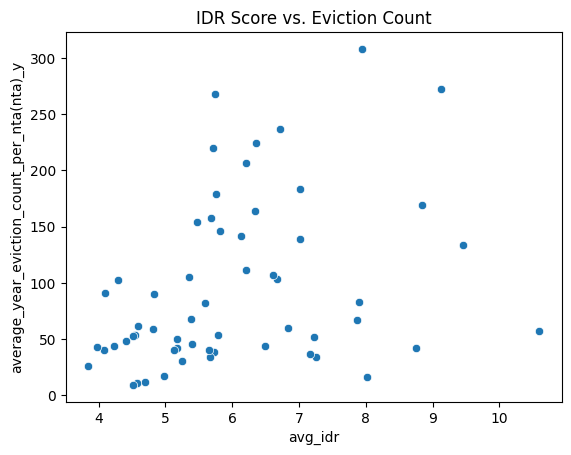

In [67]:
import seaborn as sns
sns.scatterplot(data=idr_evi, x='avg_idr', y='average_year_eviction_count_per_nta(nta)_y')
plt.title("IDR Score vs. Eviction Count")
plt.show()

In [68]:
evictions_top_nta = racial_avg_all.Location.to_list()[:15]
evictions_bottom_nta = racial_avg_all.Location.to_list()[-15:]

In [69]:
data = {
    'evictions_top_nta': evictions_top_nta,
    'merged_df_top15_nta': merged_df_top15_nta,
    'merged_df_top_change_15_nta': merged_df_top_change_15_nta,
    'evictions_bottom_nta': evictions_bottom_nta,
    'merged_df_bottom15_nta': merged_df_bottom15_nta,
    'merged_df_bottom_change_15_nta': merged_df_bottom_change_15_nta
}

data_df = pd.DataFrame(data)
data_df

,evictions_top_nta,merged_df_top15_nta,merged_df_top_change_15_nta,evictions_bottom_nta,merged_df_bottom15_nta,merged_df_bottom_change_15_nta
0,Crown Heights North,Lower East Side,East Flatbush,Throgs Neck,Canarsie,Borough Park
1,Central Harlem,East Harlem,Elmhurst/Corona,Fresh Meadows/Briarwood,Jamaica/St. Albans,Tottenville
2,Williamsbridge,Central Harlem,East Harlem,Bensonhurst,Tottenville,Flatbush/Midwood
3,University Heights,Brownsville,Crown Heights South,Greenwich Village,Sunnyside/Woodside,Mott Haven
4,Concourse/Highbridge,Manhattanville,Sheepshead Bay,Sunset Park,South Beach,East New York
5,East Tremont,Williamsburg/Greenpoint,Concourse/Highbridge,Midtown Business District,Woodhaven,Throgs Neck
6,Bedford Park,Crown Heights North,University Heights,Fort Greene/Brooklyn Hts,Bayside,St. George
7,East New York,Chelsea/Clinton,Unionport/Soundview,Borough Park,Upper East Side,Chelsea/Clinton
8,Flatbush/Midwood,Coney Island,Murray Hill/Stuyvesant,Murray Hill/Stuyvesant,Howard Beach,Hunts Point
9,Brownsville,Fort Greene/Brooklyn Hts,Washington Heights,Battery Park/Tribeca,Jackson Heights,East Tremont


In [70]:
evi_top_nta = set(data_df['evictions_top_nta'].to_list())
merged_df_top = set(data_df['merged_df_top15_nta'].to_list())
merged_df_top_change = set(data_df['merged_df_top_change_15_nta'].to_list())
merged_top_nta = set(data_df['merged_df_top15_nta'].to_list())
merged_top_change_nta = set(data_df['merged_df_top_change_15_nta'].to_list())
merged_bottom_nta = set(data_df['merged_df_bottom15_nta'].to_list())
merged_bottom_change_nta = set(data_df['merged_df_bottom_change_15_nta'].to_list())
evi_bottom_nta = set(data_df['evictions_bottom_nta'].to_list())
merged_df_bottom = set(data_df['merged_df_bottom15_nta'].to_list())
merged_df_bottom_change = set(data_df['merged_df_bottom_change_15_nta'].to_list())
matched_eviction_df1 = evi_top_nta.intersection(merged_top_nta)
matched_eviction_df2 = evi_top_nta.intersection(merged_top_change_nta)
matched_eviction_df3 = merged_df_top.intersection(merged_df_top_change)
matched_eviction_df4 = evi_bottom_nta.intersection(merged_bottom_nta)
matched_eviction_df5 = evi_bottom_nta.intersection(merged_bottom_change_nta)
matched_eviction_df6 = merged_df_bottom.intersection(merged_df_bottom_change)
matched_eviction_df1, matched_eviction_df2, matched_eviction_df3, matched_eviction_df4, matched_eviction_df5, matched_eviction_df6

({'Brownsville', 'Central Harlem', 'Crown Heights North', 'East New York'},
 {'Concourse/Highbridge',
  'Crown Heights South',
  'East Flatbush',
  'University Heights',
  'Washington Heights',
  'Williamsbridge'},
 {'East Harlem', 'Lower East Side', 'Manhattanville'},
 {'Battery Park/Tribeca',
  'Bayside',
  'Greenwich Village',
  'South Beach',
  'Tottenville'},
 {'Battery Park/Tribeca',
  'Borough Park',
  'Greenwich Village',
  'Midtown Business District',
  'Throgs Neck',
  'Tottenville'},
 {'Battery Park/Tribeca', 'Greenwich Village', 'Tottenville'})

In [71]:
idr_evi.rename(columns={'average_year_eviction_count_per_nta(nta)_y': 'eviction_count'}, inplace=True)

In [72]:
import statsmodels.api as sm

In [73]:
idr_evi.rename(columns={'average_year_eviction_count_per_nta(nta)_y': 'eviction_count'}, inplace=True)

In [74]:
idr_evi

,Location,avg_idr,avg_change,eviction_count,ep_afam,ep_asian,ep_hisp,ep_nhpi,ep_white,ep_twomore,ep_otherrace,rpl_themes,avg_change_abs,2005_median_income,2023_median_income,income_change,income_change_ratio,median_income
0,Lower East Side,10.59498500,7.27757147,56.72749658,7.25841313,24.79630643,22.40054720,0.02147743,41.26388509,3.46005472,0.73830369,0.86751806,7.27757147,48525.26513000,54482.00000000,5956.73487000,12.27553287,51503.63256500
1,East Harlem,9.44691500,10.46182847,133.62208301,32.34917776,7.68285043,41.94369616,0.00000000,14.31527016,2.55160532,1.09256069,0.97807283,10.46182847,40772.78860000,45233.00000000,4460.21140000,10.93918653,43002.89430000
2,Central Harlem,9.12608250,-0.41601528,272.54174397,50.90723562,4.55092764,26.56739332,0.00009276,13.71182746,3.29053803,0.89675325,0.95695213,0.41601528,40501.80767000,48977.00000000,8475.19233000,20.92546683,44739.40383500
3,Brownsville,8.83346500,-17.20713263,169.40316880,68.28379037,1.19226082,17.88738574,0.00030469,7.22985984,4.65941499,0.45423522,0.97347709,17.20713263,33598.60655000,41876.00000000,8277.39345000,24.63612126,37737.30327500
4,Manhattanville,8.75022000,6.19990767,42.20000000,28.90189573,6.58199052,37.32037915,0.00000000,22.26682464,3.81753555,0.90710900,0.93138720,6.19990767,42333.57815000,54508.00000000,12174.42185000,28.75831050,48420.78907500
5,Williamsburg/Greenpoint,8.01481750,2.17201478,16.41066667,4.19600000,5.19733333,17.46933333,0.00000000,66.76933333,5.70800000,0.51600000,0.71599333,2.17201478,46104.60315000,111492.00000000,65387.39685000,141.82400971,78798.30157500
6,Crown Heights North,7.94046750,-3.80151459,307.98520746,53.35267589,2.61178593,14.49314492,0.00036079,24.12886350,4.31124474,0.94810583,0.92130764,3.80151459,45951.70330000,91506.00000000,45554.29670000,99.13516459,68728.85165000
7,Chelsea/Clinton,7.89845000,-9.92344986,82.50553506,5.74575646,16.97896679,17.39421894,0.09348093,54.94292743,4.29335793,0.49102091,0.74494539,9.92344986,106854.28694000,122723.00000000,15868.71306000,14.85079683,114788.64347000
8,Coney Island,7.86151500,-0.79680862,66.77763371,13.81766613,11.62042139,15.74700162,0.00000000,54.67406807,3.72512156,0.18978930,0.97732237,0.79680862,38309.73854000,41428.00000000,3118.26146000,8.13960517,39868.86927000
9,Fort Greene/Brooklyn Hts,7.24907750,2.07995590,34.05645390,18.06921986,8.48226950,13.71475177,0.19914894,53.00624113,5.67517730,0.72624113,0.77357376,2.07995590,77383.97633000,151134.00000000,73750.02367000,95.30399854,114258.98816500


In [75]:
idr_evi['avg_idr_squared'] = idr_evi['avg_idr']**2
model = sm.OLS.from_formula(
    "np.log(eviction_count + 1) ~ avg_idr + avg_idr_squared + rpl_themes + ep_afam + ep_hisp",
    data=idr_evi
).fit()
print(model.summary())

                                OLS Regression Results                                
Dep. Variable:     np.log(eviction_count + 1)   R-squared:                       0.702
Model:                                    OLS   Adj. R-squared:                  0.673
Method:                         Least Squares   F-statistic:                     24.44
Date:                        Wed, 21 May 2025   Prob (F-statistic):           1.43e-12
Time:                                22:13:47   Log-Likelihood:                -35.305
No. Observations:                          58   AIC:                             82.61
Df Residuals:                              52   BIC:                             94.97
Df Model:                                   5                                         
Covariance Type:                    nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------

In [76]:
model_linear = sm.OLS.from_formula(
    "np.log(eviction_count + 1) ~ avg_idr + ep_afam + ep_hisp",
    data=idr_evi
).fit()
print(model_linear.summary())

                                OLS Regression Results                                
Dep. Variable:     np.log(eviction_count + 1)   R-squared:                       0.693
Model:                                    OLS   Adj. R-squared:                  0.676
Method:                         Least Squares   F-statistic:                     40.59
Date:                        Wed, 21 May 2025   Prob (F-statistic):           7.23e-14
Time:                                22:13:47   Log-Likelihood:                -36.143
No. Observations:                          58   AIC:                             80.29
Df Residuals:                              54   BIC:                             88.53
Df Model:                                   3                                         
Covariance Type:                    nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------

In [77]:
idr_evi['avg_idr_squared'] = idr_evi['avg_idr']**2
model = sm.OLS.from_formula(
    "np.log(eviction_count + 1) ~ avg_idr + avg_idr_squared + rpl_themes +  ep_afam + ep_hisp",
    data=idr_evi
).fit()
print(model.summary())

                                OLS Regression Results                                
Dep. Variable:     np.log(eviction_count + 1)   R-squared:                       0.702
Model:                                    OLS   Adj. R-squared:                  0.673
Method:                         Least Squares   F-statistic:                     24.44
Date:                        Wed, 21 May 2025   Prob (F-statistic):           1.43e-12
Time:                                22:13:47   Log-Likelihood:                -35.305
No. Observations:                          58   AIC:                             82.61
Df Residuals:                              52   BIC:                             94.97
Df Model:                                   5                                         
Covariance Type:                    nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------

In [78]:
idr_evi['log_avg_idr'] = np.log(idr_evi['avg_idr'] + 1)

In [79]:
model_enhanced = sm.OLS.from_formula(
    "np.log(eviction_count + 1) ~ avg_idr + avg_idr_squared + ep_afam + ep_hisp + rpl_themes",
    data=idr_evi
).fit()
print(model_linear.summary())

                                OLS Regression Results                                
Dep. Variable:     np.log(eviction_count + 1)   R-squared:                       0.693
Model:                                    OLS   Adj. R-squared:                  0.676
Method:                         Least Squares   F-statistic:                     40.59
Date:                        Wed, 21 May 2025   Prob (F-statistic):           7.23e-14
Time:                                22:13:47   Log-Likelihood:                -36.143
No. Observations:                          58   AIC:                             80.29
Df Residuals:                              54   BIC:                             88.53
Df Model:                                   3                                         
Covariance Type:                    nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------

In [80]:
eviction_df_agg.rename(columns={'Locations': 'Location'}, inplace=True)
# idr_evi

In [81]:
eviction_df_agg.rename(columns = {'neighborhood': 'Location'}, inplace= True)

In [82]:
idr_evi = idr_evi.merge(
    eviction_df_agg,
    on='Location',
    how='left'
)

In [83]:
idr_evi.shape

(66395, 146)

In [84]:
# idr_evi = idr_evi.merge(
#     median_income_df,
#     on='Location',
#     how='left'
# )

In [85]:
idr_evi.shape

(66395, 146)

In [86]:
idr_evi.head(1)

,Location,avg_idr,avg_change,eviction_count,ep_afam_x,ep_asian_x,ep_hisp_x,ep_nhpi_x,ep_white_x,ep_twomore_x,ep_otherrace_x,rpl_themes_x,avg_change_abs,2005_median_income,2023_median_income,income_change,income_change_ratio,median_income,avg_idr_squared,log_avg_idr,primary_key,bbl,court_index_number,docket_number,eviction_address,eviction_apartment_number,executed_date,borough,zipcode,ejectment,eviction/legal_possession,latitude,longitude,community_board,council_district,census_tract,bin,nta,year,month_year,geometry,yearbuilt,bldgclass,numfloors,unitsres,ownername,bldgarea,building_type,building_category,is_condo,floor_category,rent_era,architectural_style,economic_period,residential_units_category,is_llc,building_size_category,size_quartile,decade,fips,e_totpop,rpl_theme1,rpl_theme2,rpl_theme3,rpl_theme4,rpl_themes_y,ep_pov150,ep_unemp,ep_nohsdp,ep_uninsur,ep_age65,ep_age17,ep_disabl,ep_limeng,ep_noveh,ep_crowd,ep_hburd,ep_afam_y,ep_hisp_y,ep_asian_y,ep_aian,ep_nhpi_y,ep_twomore_y,ep_otherrace_y,ep_minrty,ep_white_y,invalid_zip,svi_quartile,svi_group,air_quality,animal_issues,appliances,building_exterior,doors_windows,electrical_issues,elevator_issues,floors_stairs,general_complaints,graffiti_posting,heat_hot_water,homeless_issues,noise_complaints,other_issues,pest_issues,plumbing_issues,police_matters,public_nuisance,safety_concerns,sanitation_issues,walls_ceilings,total_complaints,average_year_eviction_count_per_unit(building),average_year_eviction_count(building),average_year_eviction_count_per_nta(nta)_x,average_5year_eviction_count_per_unit(building),bh_pct,unit_count_zipcode,building_count_zipcode,average_year_eviction_count_per_zipcode(z),average_year_eviction_per_building_zipcode(z),evictions_per_zipcode_1kpop(z),evictions_per_1kunit_zipcode_1kpop(z),children_impacted_zipcode_per_1kpop(z),poverty_impacted_zipcode_per_1kpop(z),disability_impacted_zipcode_per_1kpop(z),unemployed_impacted_zipcode_per_1kpop(z),elderly_impacted_zipcode_per_1kpop(z),bh_impacted_zipcode_per_1kpop(z),hburd_impacted_zipcode_per_1kpop(z),crowd_impacted_zipcode_per_1kpop(z),limeng_impacted_zipcode_per_1kpop(z),uninsur_impacted_zipcode_per_1kpop(z),children_impacted_zipcode,people_impacted_zipcode,poverty_impacted_zipcode,disability_impacted_zipcode,unemployed_impacted_zipcode,elderly_impacted_zipcode,hburd_impacted_zipcode,bh_impacted_zipcode,crowd_impacted_zipcode,limeng_impacted_zipcode,uninsur_impacted_zipcode,novehicle_impacted_zipcode,nohsdp_impacted_zipcode,average_year_eviction_count_per_nta(nta)_y
0,Lower East Side,10.59498500,7.27757147,56.72749658,7.25841313,24.79630643,22.40054720,0.02147743,41.26388509,3.46005472,0.73830369,0.86751806,7.27757147,48525.26513000,54482.00000000,5956.73487000,12.27553287,51503.63256500,112.25370715,2.45057268,014679/18_115084,1002600001,014679/18,115084,630 WATER STREET,05E,2019-03-15,MANHATTAN,10002,Not an Ejectment,Eviction,40.71138100,-73.98286600,3.00000000,2.00000000,202.00000000,1077523,Lower East Side,2019,2019-03,POINT (-73.982866 40.711381),1940.00000000,D9,6.00000000,813.00000000,NYC HOUSING AUTHORITY,513000.00000000,pre-war,elevator,False,mid-rise,"Pre-1947, pre-rent-control","1931–1950, Manhattan Modern","1930-1945, great depression and WWII",100+ units,False,mega,Q4 (largest 25%),1940-1949,10002,76518.00000000,0.96390000,0.87810000,0.93690000,0.92540000,0.96560000,36.80000000,7.60000000,30.00000000,5.40000000,23.10000000,13.10000000,13.00000000,24.70000000,82.80000000,6.80000000,40.80000000,8.00000000,26.00000000,37.20000000,0.10000000,0.00000000,2.40000000,0.80000000,74.40000000,25.60000000,False,Q3,medium-high,6.00000000,2.00000000,0.00000000,0.00000000,3.00000000,0.00000000,4.00000000,0.00000000,0.00000000,0.00000000,0.00000000,3.00000000,942.00000000,4.00000000,10.00000000,10.00000000,9.00000000,4.00000000,0.00000000,1.00000000,0.00000000,998.00000000,0.00073801,0.60000000,76.60000000,0.00369004,34.00000000,31865.00000000,996.00000000,61.00000000,0.06124498,0.79719804,0.00000964,0.104432

In [87]:
columns_to_drop = ['average_year_eviction_count_per_nta(nta)_x', 'average_year_eviction_count_per_nta(nta)_y', 'average_year_eviction_count_per_nta(nta)_y', 'ep_afam_x',
                   'ep_asian_x', 'ep_hisp_x',	'ep_nhpi_x', 'ep_white_x', 'ep_twomore_x', 'ep_otherrace_x', 'rpl_themes_x']
idr_evi.drop(columns=columns_to_drop, inplace=True)

In [88]:
idr_evi.rename(columns={'ep_afam_y': 'ep_afam', 'ep_asian_y': 'ep_asian', 'ep_hisp_y': 'ep_hisp', 'ep_nhpi_y': 'ep_nhpi',
                        'ep_white_y': 'ep_white', 'ep_twomore_y': 'ep_twomore', 'ep_otherrace_y': 'ep_otherrace', 'rpl_themes_y': 'rpl_themes'}, inplace=True)

In [89]:
idr_evi.columns[-35:]

Index(['walls_ceilings', 'total_complaints',
       'average_year_eviction_count_per_unit(building)',
       'average_year_eviction_count(building)',
       'average_5year_eviction_count_per_unit(building)', 'bh_pct',
       'unit_count_zipcode', 'building_count_zipcode',
       'average_year_eviction_count_per_zipcode(z)',
       'average_year_eviction_per_building_zipcode(z)',
       'evictions_per_zipcode_1kpop(z)',
       'evictions_per_1kunit_zipcode_1kpop(z)',
       'children_impacted_zipcode_per_1kpop(z)',
       'poverty_impacted_zipcode_per_1kpop(z)',
       'disability_impacted_zipcode_per_1kpop(z)',
       'unemployed_impacted_zipcode_per_1kpop(z)',
       'elderly_impacted_zipcode_per_1kpop(z)',
       'bh_impacted_zipcode_per_1kpop(z)',
       'hburd_impacted_zipcode_per_1kpop(z)',
       'crowd_impacted_zipcode_per_1kpop(z)',
       'limeng_impacted_zipcode_per_1kpop(z)',
       'uninsur_impacted_zipcode_per_1kpop(z)', 'children_impacted_zipcode',
       'people_impacted

In [90]:
idr_evi = idr_evi.rename(columns={'average_year_eviction_count_per_zipcode(z)': 'eviction_count_zipcode'})
idr_evi = idr_evi.rename(columns={'avg_change': 'avg_idr_change'})
idr_evi = idr_evi.rename(columns={'average_year_eviction_count(building)': 'eviction_count_building'})
idr_evi = idr_evi.rename(columns={'average_year_eviction_count_per_unit(building)': 'eviction_count_unit'})
idr_evi = idr_evi.rename(columns={'eviction_count': 'eviction_count_nta'})

In [91]:
model = sm.OLS.from_formula(
    'eviction_count_nta ~ avg_idr + ep_pov150',
    data=idr_evi
).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     eviction_count_nta   R-squared:                       0.344
Model:                            OLS   Adj. R-squared:                  0.344
Method:                 Least Squares   F-statistic:                 1.739e+04
Date:                Wed, 21 May 2025   Prob (F-statistic):               0.00
Time:                        22:13:48   Log-Likelihood:            -3.6751e+05
No. Observations:               66395   AIC:                         7.350e+05
Df Residuals:                   66392   BIC:                         7.350e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -43.8676      1.232    -35.595      0.0

In [92]:
idr_evi.head(1)

,Location,avg_idr,avg_idr_change,eviction_count_nta,avg_change_abs,2005_median_income,2023_median_income,income_change,income_change_ratio,median_income,avg_idr_squared,log_avg_idr,primary_key,bbl,court_index_number,docket_number,eviction_address,eviction_apartment_number,executed_date,borough,zipcode,ejectment,eviction/legal_possession,latitude,longitude,community_board,council_district,census_tract,bin,nta,year,month_year,geometry,yearbuilt,bldgclass,numfloors,unitsres,ownername,bldgarea,building_type,building_category,is_condo,floor_category,rent_era,architectural_style,economic_period,residential_units_category,is_llc,building_size_category,size_quartile,decade,fips,e_totpop,rpl_theme1,rpl_theme2,rpl_theme3,rpl_theme4,rpl_themes,ep_pov150,ep_unemp,ep_nohsdp,ep_uninsur,ep_age65,ep_age17,ep_disabl,ep_limeng,ep_noveh,ep_crowd,ep_hburd,ep_afam,ep_hisp,ep_asian,ep_aian,ep_nhpi,ep_twomore,ep_otherrace,ep_minrty,ep_white,invalid_zip,svi_quartile,svi_group,air_quality,animal_issues,appliances,building_exterior,doors_windows,electrical_issues,elevator_issues,floors_stairs,general_complaints,graffiti_posting,heat_hot_water,homeless_issues,noise_complaints,other_issues,pest_issues,plumbing_issues,police_matters,public_nuisance,safety_concerns,sanitation_issues,walls_ceilings,total_complaints,eviction_count_unit,eviction_count_building,average_5year_eviction_count_per_unit(building),bh_pct,unit_count_zipcode,building_count_zipcode,eviction_count_zipcode,average_year_eviction_per_building_zipcode(z),evictions_per_zipcode_1kpop(z),evictions_per_1kunit_zipcode_1kpop(z),children_impacted_zipcode_per_1kpop(z),poverty_impacted_zipcode_per_1kpop(z),disability_impacted_zipcode_per_1kpop(z),unemployed_impacted_zipcode_per_1kpop(z),elderly_impacted_zipcode_per_1kpop(z),bh_impacted_zipcode_per_1kpop(z),hburd_impacted_zipcode_per_1kpop(z),crowd_impacted_zipcode_per_1kpop(z),limeng_impacted_zipcode_per_1kpop(z),uninsur_impacted_zipcode_per_1kpop(z),children_impacted_zipcode,people_impacted_zipcode,poverty_impacted_zipcode,disability_impacted_zipcode,unemployed_impacted_zipcode,elderly_impacted_zipcode,hburd_impacted_zipcode,bh_impacted_zipcode,crowd_impacted_zipcode,limeng_impacted_zipcode,uninsur_impacted_zipcode,novehicle_impacted_zipcode,nohsdp_impacted_zipcode
0,Lower East Side,10.59498500,7.27757147,56.72749658,7.27757147,48525.26513000,54482.00000000,5956.73487000,12.27553287,51503.63256500,112.25370715,2.45057268,014679/18_115084,1002600001,014679/18,115084,630 WATER STREET,05E,2019-03-15,MANHATTAN,10002,Not an Ejectment,Eviction,40.71138100,-73.98286600,3.00000000,2.00000000,202.00000000,1077523,Lower East Side,2019,2019-03,POINT (-73.982866 40.711381),1940.00000000,D9,6.00000000,813.00000000,NYC HOUSING AUTHORITY,513000.00000000,pre-war,elevator,False,mid-rise,"Pre-1947, pre-rent-control","1931–1950, Manhattan Modern","1930-1945, great depression and WWII",100+ units,False,mega,Q4 (largest 25%),1940-1949,10002,76518.00000000,0.96390000,0.87810000,0.93690000,0.92540000,0.96560000,36.80000000,7.60000000,30.00000000,5.40000000,23.10000000,13.10000000,13.00000000,24.70000000,82.80000000,6.80000000,40.80000000,8.00000000,26.00000000,37.20000000,0.10000000,0.00000000,2.40000000,0.80000000,74.40000000,25.60000000,False,Q3,medium-high,6.00000000,2.00000000,0.00000000,0.00000000,3.00000000,0.00000000,4.00000000,0.00000000,0.00000000,0.00000000,0.00000000,3.00000000,942.00000000,4.00000000,10.00000000,10.00000000,9.00000000,4.00000000,0.00000000,1.00000000,0.00000000,998.00000000,0.00073801,0.60000000,0.00369004,34.00000000,31865.00000000,996.00000000,61.00000000,0.06124498,0.79719804,0.00000964,0.10443294,0.29336888,0.10363575,0.06058705,0.18415275,0.27104734,0.32525680,0.05420947,0.19690792,0.04304869,20.05741000,153.11000000,56.34448000,19.90430000,11.63636000,35.36841000,62.46888000,52.05740000,10.41148000,37.81817000,8.26794000,126.77508000,45.93300000


In [93]:
# stop

In [94]:
model = sm.OLS.from_formula(
    "eviction_count_zipcode ~ avg_idr + ep_pov150",
    data=idr_evi
).fit()
print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     eviction_count_zipcode   R-squared:                       0.452
Model:                                OLS   Adj. R-squared:                  0.452
Method:                     Least Squares   F-statistic:                 2.734e+04
Date:                    Wed, 21 May 2025   Prob (F-statistic):               0.00
Time:                            22:13:48   Log-Likelihood:            -3.9767e+05
No. Observations:                   66395   AIC:                         7.953e+05
Df Residuals:                       66392   BIC:                         7.954e+05
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   

In [95]:
model = sm.OLS.from_formula(
    "eviction_count_zipcode ~ avg_idr_squared + ep_pov150 + ep_afam + ep_hisp ",
    data=idr_evi
).fit()
print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     eviction_count_zipcode   R-squared:                       0.572
Model:                                OLS   Adj. R-squared:                  0.572
Method:                     Least Squares   F-statistic:                 2.222e+04
Date:                    Wed, 21 May 2025   Prob (F-statistic):               0.00
Time:                            22:13:49   Log-Likelihood:            -3.8941e+05
No. Observations:                   66395   AIC:                         7.788e+05
Df Residuals:                       66390   BIC:                         7.789e+05
Df Model:                               4                                         
Covariance Type:                nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
In

In [96]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = idr_evi[['avg_idr', 'avg_change_abs', 'rpl_themes', 'ep_pov150',  'ep_afam', 'ep_hisp']]
vifs = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(pd.DataFrame({'Variable': X.columns, 'VIF': vifs}))

         Variable         VIF
0         avg_idr 26.47647613
1  avg_change_abs  3.21997223
2      rpl_themes 39.14681975
3       ep_pov150 23.17142242
4         ep_afam  3.95079150
5         ep_hisp 11.00433421


In [97]:
idr_evi[['ep_hisp', 'avg_idr', 'ep_afam']].corr()

,ep_hisp,avg_idr,ep_afam
ep_hisp,1.00000000,-0.07150721,-0.30311935
avg_idr,-0.07150721,1.00000000,0.22197948
ep_afam,-0.30311935,0.22197948,1.00000000


In [98]:
from sklearn.decomposition import PCA
idr_evi['svi_pca'] = PCA(n_components=1).fit_transform(idr_evi[['rpl_theme1', 'rpl_theme4']])

In [99]:
idr_evi_std = idr_evi.copy()
for col in ['avg_idr', 'ep_afam', 'ep_hisp', 'unitsres']:
    idr_evi_std[col] = (idr_evi[col] - idr_evi[col].mean()) / idr_evi[col].std()

model_std = sm.OLS.from_formula(
    "np.log(eviction_count_nta + 1) ~ avg_idr + ep_afam + ep_hisp + ep_hburd",
    data=idr_evi_std
).fit()
print(model_std.summary())

                                  OLS Regression Results                                  
Dep. Variable:     np.log(eviction_count_nta + 1)   R-squared:                       0.616
Model:                                        OLS   Adj. R-squared:                  0.616
Method:                             Least Squares   F-statistic:                 2.666e+04
Date:                            Wed, 21 May 2025   Prob (F-statistic):               0.00
Time:                                    22:13:51   Log-Likelihood:                -35583.
No. Observations:                           66395   AIC:                         7.118e+04
Df Residuals:                               66390   BIC:                         7.122e+04
Df Model:                                       4                                         
Covariance Type:                        nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------

In [100]:
model_clean = sm.OLS.from_formula(
    "np.log(eviction_count_nta + 1) ~ avg_idr + ep_afam + ep_hisp + ep_hburd + ep_crowd + ep_age17 + ep_uninsur + \
    ep_limeng + rpl_theme4 + rpl_theme1 + unitsres + building_category + decade + is_llc + building_size_category + bldgclass + numfloors",
    data=idr_evi
).fit()
print(model_clean.summary())

                                  OLS Regression Results                                  
Dep. Variable:     np.log(eviction_count_nta + 1)   R-squared:                       0.691
Model:                                        OLS   Adj. R-squared:                  0.691
Method:                             Least Squares   F-statistic:                     1880.
Date:                            Wed, 21 May 2025   Prob (F-statistic):               0.00
Time:                                    22:13:53   Log-Likelihood:                -28358.
No. Observations:                           66395   AIC:                         5.688e+04
Df Residuals:                               66315   BIC:                         5.760e+04
Df Model:                                      79                                         
Covariance Type:                        nonrobust                                         
                                                        coef    std err          t      P>

In [101]:
idr_evi.head(1)

,Location,avg_idr,avg_idr_change,eviction_count_nta,avg_change_abs,2005_median_income,2023_median_income,income_change,income_change_ratio,median_income,avg_idr_squared,log_avg_idr,primary_key,bbl,court_index_number,docket_number,eviction_address,eviction_apartment_number,executed_date,borough,zipcode,ejectment,eviction/legal_possession,latitude,longitude,community_board,council_district,census_tract,bin,nta,year,month_year,geometry,yearbuilt,bldgclass,numfloors,unitsres,ownername,bldgarea,building_type,building_category,is_condo,floor_category,rent_era,architectural_style,economic_period,residential_units_category,is_llc,building_size_category,size_quartile,decade,fips,e_totpop,rpl_theme1,rpl_theme2,rpl_theme3,rpl_theme4,rpl_themes,ep_pov150,ep_unemp,ep_nohsdp,ep_uninsur,ep_age65,ep_age17,ep_disabl,ep_limeng,ep_noveh,ep_crowd,ep_hburd,ep_afam,ep_hisp,ep_asian,ep_aian,ep_nhpi,ep_twomore,ep_otherrace,ep_minrty,ep_white,invalid_zip,svi_quartile,svi_group,air_quality,animal_issues,appliances,building_exterior,doors_windows,electrical_issues,elevator_issues,floors_stairs,general_complaints,graffiti_posting,heat_hot_water,homeless_issues,noise_complaints,other_issues,pest_issues,plumbing_issues,police_matters,public_nuisance,safety_concerns,sanitation_issues,walls_ceilings,total_complaints,eviction_count_unit,eviction_count_building,average_5year_eviction_count_per_unit(building),bh_pct,unit_count_zipcode,building_count_zipcode,eviction_count_zipcode,average_year_eviction_per_building_zipcode(z),evictions_per_zipcode_1kpop(z),evictions_per_1kunit_zipcode_1kpop(z),children_impacted_zipcode_per_1kpop(z),poverty_impacted_zipcode_per_1kpop(z),disability_impacted_zipcode_per_1kpop(z),unemployed_impacted_zipcode_per_1kpop(z),elderly_impacted_zipcode_per_1kpop(z),bh_impacted_zipcode_per_1kpop(z),hburd_impacted_zipcode_per_1kpop(z),crowd_impacted_zipcode_per_1kpop(z),limeng_impacted_zipcode_per_1kpop(z),uninsur_impacted_zipcode_per_1kpop(z),children_impacted_zipcode,people_impacted_zipcode,poverty_impacted_zipcode,disability_impacted_zipcode,unemployed_impacted_zipcode,elderly_impacted_zipcode,hburd_impacted_zipcode,bh_impacted_zipcode,crowd_impacted_zipcode,limeng_impacted_zipcode,uninsur_impacted_zipcode,novehicle_impacted_zipcode,nohsdp_impacted_zipcode,svi_pca
0,Lower East Side,10.59498500,7.27757147,56.72749658,7.27757147,48525.26513000,54482.00000000,5956.73487000,12.27553287,51503.63256500,112.25370715,2.45057268,014679/18_115084,1002600001,014679/18,115084,630 WATER STREET,05E,2019-03-15,MANHATTAN,10002,Not an Ejectment,Eviction,40.71138100,-73.98286600,3.00000000,2.00000000,202.00000000,1077523,Lower East Side,2019,2019-03,POINT (-73.982866 40.711381),1940.00000000,D9,6.00000000,813.00000000,NYC HOUSING AUTHORITY,513000.00000000,pre-war,elevator,False,mid-rise,"Pre-1947, pre-rent-control","1931–1950, Manhattan Modern","1930-1945, great depression and WWII",100+ units,False,mega,Q4 (largest 25%),1940-1949,10002,76518.00000000,0.96390000,0.87810000,0.93690000,0.92540000,0.96560000,36.80000000,7.60000000,30.00000000,5.40000000,23.10000000,13.10000000,13.00000000,24.70000000,82.80000000,6.80000000,40.80000000,8.00000000,26.00000000,37.20000000,0.10000000,0.00000000,2.40000000,0.80000000,74.40000000,25.60000000,False,Q3,medium-high,6.00000000,2.00000000,0.00000000,0.00000000,3.00000000,0.00000000,4.00000000,0.00000000,0.00000000,0.00000000,0.00000000,3.00000000,942.00000000,4.00000000,10.00000000,10.00000000,9.00000000,4.00000000,0.00000000,1.00000000,0.00000000,998.00000000,0.00073801,0.60000000,0.00369004,34.00000000,31865.00000000,996.00000000,61.00000000,0.06124498,0.79719804,0.00000964,0.10443294,0.29336888,0.10363575,0.06058705,0.18415275,0.27104734,0.32525680,0.05420947,0.19690792,0.04304869,20.05741000,153.11000000,56.34448000,19.90430000,11.63636000,35.36841000,62.46888000,52.05740000,10.41148000,37.81817000,8.26794000,126.77508000,45.93300000,0.05104681


In [102]:
model_clean = sm.OLS.from_formula(
    "np.log(eviction_count_nta + 1) ~ avg_idr + median_income + ep_afam + ep_hisp + ep_hburd + ep_crowd + ep_age17 + ep_uninsur + \
    ep_limeng + rpl_theme4 + rpl_theme1 + unitsres + building_category + decade + is_llc + bldgclass + numfloors",
    data=idr_evi
).fit()
print(model_clean.summary())

                                  OLS Regression Results                                  
Dep. Variable:     np.log(eviction_count_nta + 1)   R-squared:                       0.703
Model:                                        OLS   Adj. R-squared:                  0.702
Method:                             Least Squares   F-statistic:                     2146.
Date:                            Wed, 21 May 2025   Prob (F-statistic):               0.00
Time:                                    22:13:54   Log-Likelihood:                -27126.
No. Observations:                           66395   AIC:                         5.440e+04
Df Residuals:                               66321   BIC:                         5.507e+04
Df Model:                                      73                                         
Covariance Type:                        nonrobust                                         
                                                        coef    std err          t      P>

In [103]:
median_income_df.head(1)

,Location,2005_median_income,2023_median_income,income_change,income_change_ratio,median_income
0,Astoria,57043.75476000,84590.00000000,27546.24524000,48.28967756,70816.87738000


In [104]:
racial_vars = ['ep_afam', 'ep_hisp', 'ep_asian', 'ep_aian', 'ep_nhpi', 'ep_twomore', 'ep_otherrace', 'ep_minrty', 'ep_white']
economic_vars = ["avg_idr", "avg_change_abs", "avg_idr_squared", 'income_change', 'income_change_ratio']
gentrification_vars = ['ep_nohsdp', 'ep_age65','ep_age17', 'ep_disabl', 'ep_limeng', 'ep_noveh', 'ep_crowd', 'median_income',"ep_pov150", "ep_unemp", "ep_hburd", 'ep_uninsur']
svi_vars = ["rpl_theme1", "rpl_theme2", "rpl_theme3", "rpl_theme4"]
building_vars = ['yearbuilt', 'numfloors', 'unitsres', 'bldgarea', 'building_type','is_condo']
complaints_vars = ['air_quality', 'animal_issues', \
       'appliances', 'building_exterior', 'doors_windows', 'electrical_issues', \
       'elevator_issues', 'floors_stairs', 'general_complaints', \
       'graffiti_posting', 'heat_hot_water', 'homeless_issues', \
       'noise_complaints', 'other_issues', 'pest_issues', 'plumbing_issues', \
       'police_matters', 'public_nuisance', 'safety_concerns', 'sanitation_issues', 'walls_ceilings', 'total_complaints']


In [105]:
groups_ordered = OrderedDict([
    ('Racial', racial_vars),
    ('socialeconomic', gentrification_vars),
    ('Gentrification Proxies', economic_vars),
    ('SVI', svi_vars),
    ('Building', building_vars),
    ('Complaints', complaints_vars)
])

In [108]:
results = {}
cumulative_vars = []

In [109]:
for name, vars in groups_ordered.items():
    cumulative_vars.extend(vars)
    formula = f"np.log(eviction_count_nta + 1) ~ {' + '.join(cumulative_vars)}"
    model = sm.OLS.from_formula(formula, data=idr_evi).fit()
    # results = []

    results[f"Model up to {name}"] = {
        "R-squared": model.rsquared,
        "Adj. R-squared": model.rsquared_adj,
        "Added Group": name,
        "New Vars": vars,
        # how r-squares change
        # this metric matters as the determinant for the importances of the factors
        "Delta R-squared": model.rsquared - (results[list(results.keys())[-1]]["R-squared"] if results else 0)
    }

results_df = pd.DataFrame(results).T

In [110]:
results_df.sort_values("Delta R-squared", ascending=True)

,R-squared,Adj. R-squared,Added Group,New Vars,Delta R-squared
Model up to Complaints,0.77147922,0.77128631,Complaints,"[air_quality, animal_issues, appliances, building_exterior, doors_windows, electrical_issues, elevator_issues, floors_stairs, general_complaints, graffiti_posting, heat_hot_water, homeless_issues, noise_complaints, other_issues, pest_issues, plumbing_issues, police_matters, public_nuisance, safety_concerns, sanitation_issues, walls_ceilings, total_complaints]",0.00200188
Model up to Building,0.76947734,0.76935575,Building,"[yearbuilt, numfloors, unitsres, bldgarea, building_type, is_condo]",0.00268639
Model up to SVI,0.76679095,0.76668904,SVI,"[rpl_theme1, rpl_theme2, rpl_theme3, rpl_theme4]",0.00507656
Model up to Gentrification Proxies,0.76171439,0.76162463,Gentrification Proxies,"[avg_idr, avg_change_abs, avg_idr_squared, income_change, income_change_ratio]",0.03536377
Model up to socialeconomic,0.72635062,0.72626816,socialeconomic,"[ep_nohsdp, ep_age65, ep_age17, ep_disabl, ep_limeng, ep_noveh, ep_crowd, median_income, ep_pov150, ep_unemp, ep_hburd, ep_uninsur]",0.16288499
Model up to Racial,0.56346563,0.56341302,Racial,"[ep_afam, ep_hisp, ep_asian, ep_aian, ep_nhpi, ep_twomore, ep_otherrace, ep_minrty, ep_white]",0.56346563


In [111]:
groups = {
    "Economic": ["avg_idr", "avg_change_abs", "avg_idr_squared",'income_change', 'income_change_ratio'],
    "Gentrification": ['ep_nohsdp', 'ep_age65','ep_age17', 'ep_disabl', 'ep_limeng', 'ep_noveh', 'ep_crowd', "ep_pov150", "ep_unemp", "ep_hburd", 'ep_uninsur', 'median_income'],
    "SVI": ["rpl_theme1", "rpl_theme2", "rpl_theme3", "rpl_theme4"],
    "Building": ['yearbuilt', 'numfloors', 'unitsres', 'bldgarea', 'building_type','is_condo'],
    "Complaints": ['air_quality', 'animal_issues', \
       'appliances', 'building_exterior', 'doors_windows', 'electrical_issues', \
       'elevator_issues', 'floors_stairs', 'general_complaints', \
       'graffiti_posting', 'heat_hot_water', 'homeless_issues', \
       'noise_complaints', 'other_issues', 'pest_issues', 'plumbing_issues', \
       'police_matters', 'public_nuisance', 'safety_concerns', 'sanitation_issues', 'walls_ceilings', 'total_complaints'],
    "Racial": ['ep_afam', 'ep_hisp', 'ep_asian', 'ep_aian', 'ep_nhpi', 'ep_twomore', 'ep_otherrace', 'ep_minrty', 'ep_white',],
}

In [ ]:
# idr_evi_std['decade'].head()

In [ ]:
# idr_evi_std['decade'].isnull().sum()
# # idr_evi_std = idr_evi_std.dropna(subset=['decade'])
# print(idr_evi_std['decade'].dtype)
# stop
# idr_evi_std['decade'] = pd.to_numeric(idr_evi_std['decade'], errors='coerce')
# idr_evi_std['decade'].dtype, idr_evi_std.isna().sum().sum()

In [112]:
building_type_map = {
    "pre-war": 0,
    'post-war': 1,
}
idr_evi['building_type'] = idr_evi['building_type'].map(building_type_map)

In [113]:
# idr_evi_std['is_llc'].head()
idr_evi['is_llc'] = idr_evi['is_llc'].astype(int)
idr_evi['is_condo'] = idr_evi['is_condo'].astype(int)

In [114]:
# idr_evi.columns.to_list()

In [115]:
idr_evi.columns[-125:-30]

Index(['primary_key', 'bbl', 'court_index_number', 'docket_number',
       'eviction_address', 'eviction_apartment_number', 'executed_date',
       'borough', 'zipcode', 'ejectment', 'eviction/legal_possession',
       'latitude', 'longitude', 'community_board', 'council_district',
       'census_tract', 'bin', 'nta', 'year', 'month_year', 'geometry',
       'yearbuilt', 'bldgclass', 'numfloors', 'unitsres', 'ownername',
       'bldgarea', 'building_type', 'building_category', 'is_condo',
       'floor_category', 'rent_era', 'architectural_style', 'economic_period',
       'residential_units_category', 'is_llc', 'building_size_category',
       'size_quartile', 'decade', 'fips', 'e_totpop', 'rpl_theme1',
       'rpl_theme2', 'rpl_theme3', 'rpl_theme4', 'rpl_themes', 'ep_pov150',
       'ep_unemp', 'ep_nohsdp', 'ep_uninsur', 'ep_age65', 'ep_age17',
       'ep_disabl', 'ep_limeng', 'ep_noveh', 'ep_crowd', 'ep_hburd', 'ep_afam',
       'ep_hisp', 'ep_asian', 'ep_aian', 'ep_nhpi', 'ep_twom

In [116]:
results = {}
for name, vars in groups.items():
    formula = f"np.log(eviction_count_nta + 1) ~ {' + '.join(vars)}"
    model = sm.OLS.from_formula(formula, data=idr_evi).fit()
    results[name] = {
        "R-squared": model.rsquared,
        "Adj. R-squared": model.rsquared_adj,
        "Sig. Vars": [var for var in vars]
    }

results_df = pd.DataFrame(results).T
results_df.sort_values("R-squared", ascending=False)

,R-squared,Adj. R-squared,Sig. Vars
Gentrification,0.69542113,0.69536607,"[ep_nohsdp, ep_age65, ep_age17, ep_disabl, ep_limeng, ep_noveh, ep_crowd, ep_pov150, ep_unemp, ep_hburd, ep_uninsur, median_income]"
Racial,0.56346563,0.56341302,"[ep_afam, ep_hisp, ep_asian, ep_aian, ep_nhpi, ep_twomore, ep_otherrace, ep_minrty, ep_white]"
SVI,0.41262387,0.41258848,"[rpl_theme1, rpl_theme2, rpl_theme3, rpl_theme4]"
Economic,0.34118725,0.34113764,"[avg_idr, avg_change_abs, avg_idr_squared, income_change, income_change_ratio]"
Building,0.05298030,0.05289471,"[yearbuilt, numfloors, unitsres, bldgarea, building_type, is_condo]"
Complaints,0.04983855,0.04953793,"[air_quality, animal_issues, appliances, building_exterior, doors_windows, electrical_issues, elevator_issues, floors_stairs, general_complaints, graffiti_posting, heat_hot_water, homeless_issues, noise_complaints, other_issues, pest_issues, plumbing_issues, police_matters, public_nuisance, safety_concerns, sanitation_issues, walls_ceilings, total_complaints]"


In [117]:
# base_r2 = sm.OLS.from_formula("np.log(eviction_count_nta + 1) ~ 1", data=idr_evi).fit().rsquared
# incremental = {}
# current_vars = []
# for name, vars in groups.items():
#     current_vars += vars
#     formula = f"np.log(eviction_count_nta + 1) ~ {' + '.join(current_vars)}"
#     model = sm.OLS.from_formula(formula, data=idr_evi).fit()
#     incremental[name] = model.rsquared - base_r2
#     base_r2 = model.rsquared

# pd.Series(incremental).sort_values(ascending=False)

In [118]:
final_model = sm.OLS.from_formula(
    "np.log(eviction_count_nta + 1) ~ avg_idr_squared + avg_idr_change + ep_afam + median_income + ep_hisp + ep_hburd + is_llc + ep_pov150",
    data=idr_evi
).fit()
print(final_model.summary())

                                  OLS Regression Results                                  
Dep. Variable:     np.log(eviction_count_nta + 1)   R-squared:                       0.623
Model:                                        OLS   Adj. R-squared:                  0.623
Method:                             Least Squares   F-statistic:                 1.372e+04
Date:                            Wed, 21 May 2025   Prob (F-statistic):               0.00
Time:                                    22:15:14   Log-Likelihood:                -34990.
No. Observations:                           66395   AIC:                         7.000e+04
Df Residuals:                               66386   BIC:                         7.008e+04
Df Model:                                       8                                         
Covariance Type:                        nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
------

In [119]:
# yearbuilt, numfloors, unitsres, bldgarea, building_type, is_condo
final_model = sm.OLS.from_formula(
    "np.log(eviction_count_zipcode + 1) ~ avg_idr_squared + avg_idr_change + ep_afam + median_income + ep_hisp + ep_hburd + is_llc + ep_pov150 + rpl_themes + unitsres + yearbuilt + total_complaints",
    data=idr_evi
).fit()
print(final_model.summary())

                                    OLS Regression Results                                    
Dep. Variable:     np.log(eviction_count_zipcode + 1)   R-squared:                       0.717
Model:                                            OLS   Adj. R-squared:                  0.717
Method:                                 Least Squares   F-statistic:                 1.400e+04
Date:                                Wed, 21 May 2025   Prob (F-statistic):               0.00
Time:                                        22:15:14   Log-Likelihood:                -45516.
No. Observations:                               66395   AIC:                         9.106e+04
Df Residuals:                                   66382   BIC:                         9.118e+04
Df Model:                                          12                                         
Covariance Type:                            nonrobust                                         
                       coef    std err          t 

In [120]:
idr_evi['hisp_poverty_index'] = (idr_evi['ep_hisp'] + idr_evi['ep_pov150']) / 2

In [121]:
model_refined = sm.OLS.from_formula(
    "np.log(eviction_count_nta + 1) ~ avg_idr + avg_change_abs + rpl_themes + ep_afam + hisp_poverty_index",
    data=idr_evi
).fit()
print(model_refined.summary())

                                  OLS Regression Results                                  
Dep. Variable:     np.log(eviction_count_nta + 1)   R-squared:                       0.606
Model:                                        OLS   Adj. R-squared:                  0.606
Method:                             Least Squares   F-statistic:                 2.043e+04
Date:                            Wed, 21 May 2025   Prob (F-statistic):               0.00
Time:                                    22:15:14   Log-Likelihood:                -36451.
No. Observations:                           66395   AIC:                         7.291e+04
Df Residuals:                               66389   BIC:                         7.297e+04
Df Model:                                       5                                         
Covariance Type:                        nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
---

In [122]:
model_refined = sm.OLS.from_formula(
    "np.log(eviction_count_nta + 1) ~ avg_idr + avg_change_abs + rpl_themes  + ep_afam + ep_hisp",
    data=idr_evi
).fit()
print(model_refined.summary())

                                  OLS Regression Results                                  
Dep. Variable:     np.log(eviction_count_nta + 1)   R-squared:                       0.605
Model:                                        OLS   Adj. R-squared:                  0.605
Method:                             Least Squares   F-statistic:                 2.037e+04
Date:                            Wed, 21 May 2025   Prob (F-statistic):               0.00
Time:                                    22:15:15   Log-Likelihood:                -36515.
No. Observations:                           66395   AIC:                         7.304e+04
Df Residuals:                               66389   BIC:                         7.310e+04
Df Model:                                       5                                         
Covariance Type:                        nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
-------

In [123]:
sm.OLS.from_formula(
    "np.log(eviction_count_nta + 1) ~ avg_idr * ep_afam + avg_idr * ep_hisp",
    data=idr_evi
).fit()
print(model_refined.summary())

                                  OLS Regression Results                                  
Dep. Variable:     np.log(eviction_count_nta + 1)   R-squared:                       0.605
Model:                                        OLS   Adj. R-squared:                  0.605
Method:                             Least Squares   F-statistic:                 2.037e+04
Date:                            Wed, 21 May 2025   Prob (F-statistic):               0.00
Time:                                    22:15:15   Log-Likelihood:                -36515.
No. Observations:                           66395   AIC:                         7.304e+04
Df Residuals:                               66389   BIC:                         7.310e+04
Df Model:                                       5                                         
Covariance Type:                        nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
-------

In [124]:
# sm.OLS.from_formula(
#     "np.log(eviction_count + 1) ~ avg_idr * ep_afam_x + avg_idr * ep_hisp_x",
#     data=idr_evi
# ).fit()
# print(model_refined.summary())

In [125]:
import statsmodels.api as sm
idr_evi['avg_idr_squared'] = idr_evi['avg_idr']**2
model = sm.OLS.from_formula(
    "eviction_count_nta ~ avg_idr_squared",
    data=idr_evi
).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     eviction_count_nta   R-squared:                       0.104
Model:                            OLS   Adj. R-squared:                  0.104
Method:                 Least Squares   F-statistic:                     7718.
Date:                Wed, 21 May 2025   Prob (F-statistic):               0.00
Time:                        22:15:15   Log-Likelihood:            -3.7784e+05
No. Observations:               66395   AIC:                         7.557e+05
Df Residuals:                   66393   BIC:                         7.557e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          82.7889      0.705    1